**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            <center>Project - Machine Learning</center>
        </span>
    </font>
</h2>

<a id="Jupyter"></a>
<h2>
    <font size="5" color = black >
        <span style='font-family:Georgia'>
            I. Jupyter Notebook General Settings:
        </span>
    </font>
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            A. Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
# For numpy Arrays
import numpy as np

# For using pandas DataFrame
import pandas as pd

# For plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
# For plotting in the current window
%matplotlib inline

# To supress future warnings
import warnings
warnings.filterwarnings("ignore")

# For plotting missing values in barplot
import missingno as mn

## -------------------------------------------

# For Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# For KNN Classification
from sklearn.neighbors import KNeighborsClassifier

# For Implementing CrossValidation
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# For Basic Decision Classification Tree
from sklearn.tree import DecisionTreeClassifier

# For Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# For Bagging Classifier Model
from sklearn.ensemble import BaggingClassifier

# For Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

# For Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# For Classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn import metrics
## -------------------------------------------
# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For LDA - Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.pipeline import Pipeline
##----------------------------------------------

# Natural language tool kit(nltk) library 
# for applying in statistical natural language processing (NLP)
import nltk

import string

# Word Clouds are used for visual displays of text data.
from wordcloud import WordCloud

from nltk.corpus import stopwords

# For stemming the standard words example removing “ing”, “ly”, and “s” but not as it is done using PorterStemmer()
from nltk.stem import WordNetLemmatizer

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            B. Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            C. Adjust Jupyer Settings for Better Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth',500)
pd.options.display.float_format='{:.2f}'.format

Problem 1: ML Models
==================

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised. 

### Data Dictionary
- Age : Age of the Employee in Years 
- Gender : Gender of the Employee 
- Engineer : For Engineer =1 , Non Engineer =0 
- MBA : For MBA =1 , Non MBA =0 
- Work Exp : Experience in years 
- Salary : Salary in Lakhs per Annum 
- Distance : Distance in Kms from Home to Office 
- license : If Employee has Driving Licence -1, If not, then 0 
- Transport : Mode of Transport 

The objective is to build various Machine Learning models on this data set and based on the accuracy metrics decide which model is to be finalised for finally predicting the mode of transport chosen by the employee.

### Questions:
1. Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset.
2. Split the data into train and test in the ratio 70:30. Is scaling necessary or not?
3. Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance.:
    - Logistic Regression Model
    - Linear Discriminant Analysis
    - Decision Tree Classifier – CART model
    - Naïve Bayes Model
    - KNN Model
    - Random Forest Model
    - Boosting Classifier Model using Gradient boost.
4. Which model performs the best?
5. What are your business insights?

In [4]:
transport_df = pd.read_csv('Transport.csv')

### 1.1 Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset.

#### 1.1.1 Basic Data Summary

In [5]:
transport_df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.30,3.20,0,Public Transport
1,23,Female,1,0,4,8.30,3.30,0,Public Transport
2,29,Male,1,0,7,13.40,4.10,0,Public Transport
3,28,Female,1,1,5,13.40,4.50,0,Public Transport
4,27,Male,1,0,4,13.40,4.60,0,Public Transport


In [6]:
transport_df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.00,21.40,1,Private Transport
440,38,Male,1,0,19,44.00,21.50,1,Private Transport
441,37,Male,1,0,19,45.00,21.50,1,Private Transport
442,37,Male,0,0,19,47.00,22.80,1,Private Transport
443,39,Male,1,1,21,50.00,23.40,1,Private Transport


In [7]:
# Database dimension
print("Dataset dimension - usage_data                          :",transport_df.shape)

#Database size
print("Dataset size - usage_data                               :",transport_df.size)

Dataset dimension - usage_data                          : (444, 9)
Dataset size - usage_data                               : 3996


In [8]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [9]:
transport_df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [10]:
transport_df.duplicated().sum()

0

In [11]:
transport_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.00,27.75,4.42,18.00,25.00,27.00,30.00,43.00
Engineer,444.00,0.75,0.43,0.00,1.00,1.00,1.00,1.00
MBA,444.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
Work Exp,444.00,6.30,5.11,0.00,3.00,5.00,8.00,24.00
Salary,444.00,16.24,10.45,6.50,9.80,13.60,15.72,57.00
Distance,444.00,11.32,3.61,3.20,8.80,11.00,13.43,23.40
license,444.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00


In [12]:
transport_df.nunique()

Age           25
Gender         2
Engineer       2
MBA            2
Work Exp      24
Salary       122
Distance     137
license        2
Transport      2
dtype: int64

**Skewness among all the features of the dataset**

In [13]:
transport_df.skew()

Age         0.96
Engineer   -1.19
MBA         1.14
Work Exp    1.35
Salary      2.04
Distance    0.54
license     1.26
dtype: float64

**Variance of the independent variables**

In [14]:
transport_df.var()

Age         19.51
Engineer     0.19
MBA          0.19
Work Exp    26.13
Salary     109.28
Distance    13.00
license      0.18
dtype: float64

#### Basic data summary observation:

 - Data has been loaded to pandas from "Transport.csv" file
 - Records loaded in the dataframe has been shown using pandas heads and tails methods
 - The shape of dataset is - 444 x 9. It contains 444 rows and 9 columns
 - The size of the dataset is - 3996
 - There are total 9 features - 5 features as dtype of int, 2 features as dtype of float and 2 feature of dtype as Object.
 - Datatype of all the fields are updated correctly. And there is no abnormal data for features that has been loaded. 
 - For ex - when certain features are numric in nature but due to presence of invalid character('?'), the datatype is updated to object. Couldn't find any such issues in any of the features of the dataset.
 - There are no duplicates and missing values in the dataset.
 - From the data summary and unique values, we could make following observation
     - Features such as Gender, Engineer, MBA, License and Transport seems to be Categorical in as eah of these features have only 2 unique values. Transport being the Target Variable.
     - Youngest employee in the dataset is- 18 years of age.
     - Maximum age of employee in the dataset is 43 years whereas Average age of employee is 27.75 years
     - Half of the employees from the datasets age - 27 years or more.
     - Employee who earns the least salary from the dataset is- 6.50 lpa.
     - Maximum salary of employees in the dataset is -57 lpa whereas Average salary of employees is 16.24 lpa
     - Half of the employees from the datasets earn salary of 13.60 lpa or more.
     - Least distance travelled by employees from the dataset is- 3.6 km.
     - Maximum distance travelled by employees is -23.40 Km whereas Average Distance travelled by employees is 11.32 Km
     - Half of the employees from the datasets travel more than 11.0 Km from home.
     - Age, Salary and Distance columns seems to be skewed towards right. We may verify it using EDA or skewness values.
 - Skweness is measured among the datasets and outlier treatment is done if the data is extremely skewed.
	- If the skewness values is between 0.5 and 0.5, the distribution of the value is almost symmetrical. No skewness is present.
	- If the skewness values is between -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate.
	- If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data considered highly skewed.
    - In the present case:
         - Age and distance seems to be moderately skewed.
         - Engineer seems to be Negatively skewed, but this is a Categorical feature so no outlier treatment is needed for such feature.
         - MBA, Work Exp, Salary and license seems to be rightly skewed, but MBA and license is a categorical feature so no outlier treatment is needed for these 2 features. For Work Exp and Salary, we need to check if outlier treatment is needed.
 - Observed that variance among the variables Engineer, MBA and license is very close to zero (0.18) but since these are categorical variables, We can't infer that these variables will have almost no influence on the classification model.

#### 1.1.2 Univariate Analysis

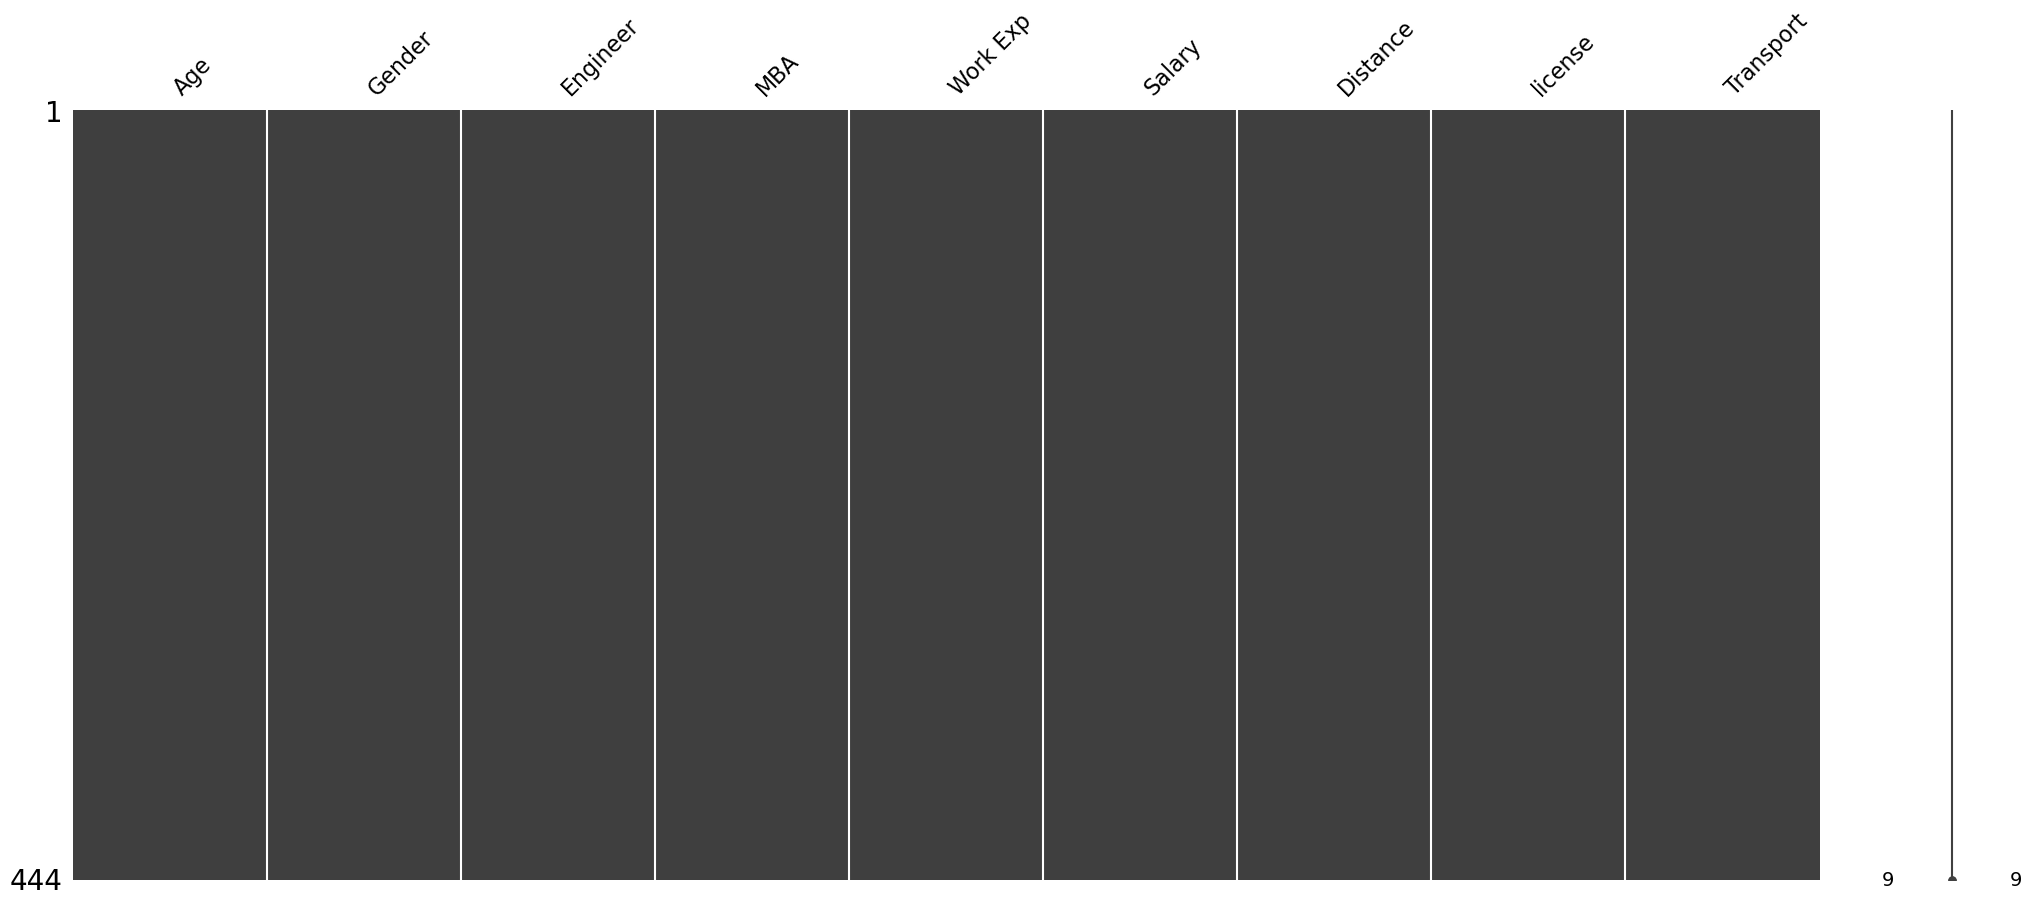

In [15]:
mn.matrix(transport_df)
plt.show()

**From the missing matrix plot we can observer that there is no missing values in the dataset given. It strengthens our earlier analysis that there is no missing value in the dataset**

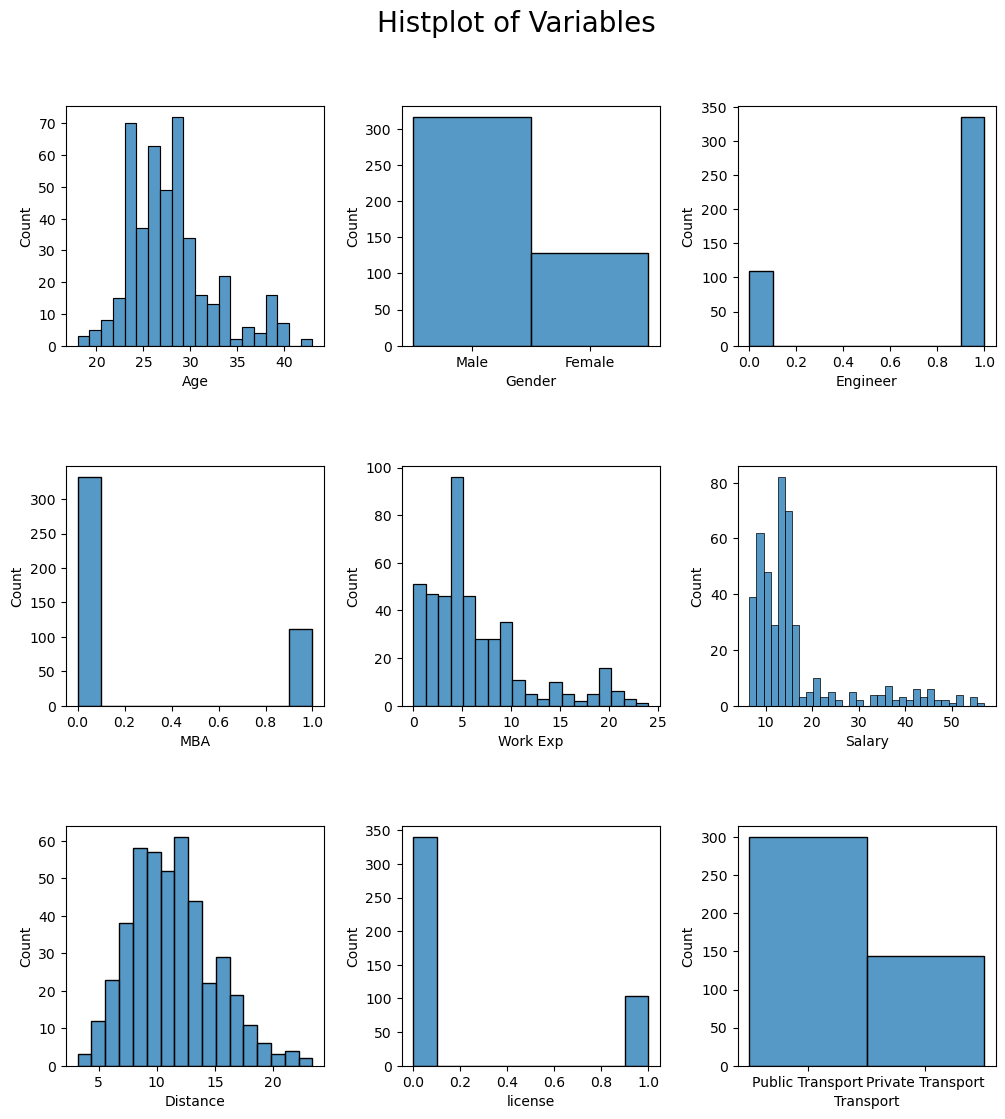

In [16]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.5, top=0.90, wspace= 0.3, bottom = 0.1)
for idx, col in enumerate(transport_df.columns): #range in number of attributes in the given dataset
    ax = fig.add_subplot(3, 3, idx+1) #adding subplot
    sns.histplot(x=transport_df[col])
    ax.set_xlabel(col)

plt.suptitle('Histplot of Variables', fontsize=20)
plt.show()

- **Observation from Histplot**
    - Age distribution is moderately skewed towards right. The values such as 40 or slightly higher is normal in nature.
    - From Gender, we could see that the no of male employees is much more than that of female employees.
    - From Engineer, we could again observe that employees who are engineers ( 1's) is much more than those who are non-engineers.
    - From MBA, we could observe that employees who are MBAs (1's) is much less than those who are non-MBAs.
    - Work Exp is rightly skewed, but we can see that the number of employees who have more than 10+ years of experience is decreasing. This is again a genuine trends.
    - Salary distribution is also rightly skewed and this is obvious keeping in mind the Work Exp distribution. The distribution seems to be genuine.
    - The distribution for Distance feature is moderately skewed and it follows normal distribution.
    - From license, we can observe that the number of people who have license is much less than the number of people who doesn't have license.
    - From Transport, we can see that the emloyees who use Public Transport is higher than those who use private transport. 

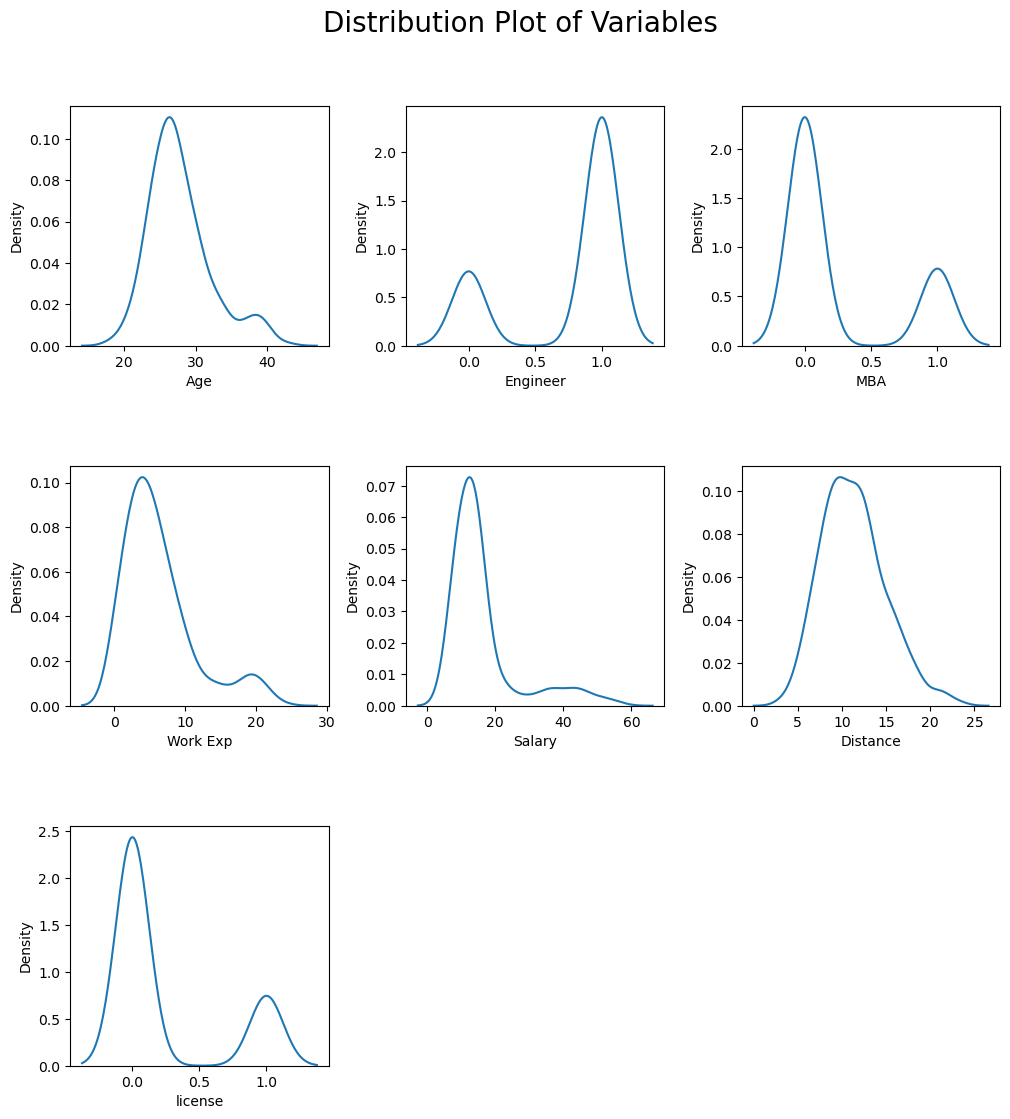

In [17]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.5, top=0.90, wspace= 0.3, bottom = 0.1)
for idx, col in enumerate(transport_df.select_dtypes(exclude='object').columns): #range in number of attributes in the given dataset
    ax = fig.add_subplot(3, 3, idx+1) #adding subplot
    sns.distplot(transport_df[col], hist=False)
    ax.set_xlabel(col)

plt.suptitle('Distribution Plot of Variables', fontsize=20)
plt.show()

- **Observation from Distplot**
    - The distribution of Age is normal but moderately skewed towards right. The values such as 40 or slightly higher is normal in nature.
    - The distribution of Work Exp is normal but skewed towards right, but we can see that the number of employees who have more than 10+ years of experience is decreasing with slight increase at 20 years. This is again a genuine trends.
    - The distribution of Salary is normal but rightly skewed very smilar to Work Exp distribution. The distribution values seems to be genuine.
    - The distribution for Distance feature is moderately skewed and it follows normal distribution.
    - For Engineer, MAB and license, we can observe that the distribution is not normal. It could be because these variables are categorical in nature.

#### 1.1.3 Bivariate Analysis and Multivariate Analysis

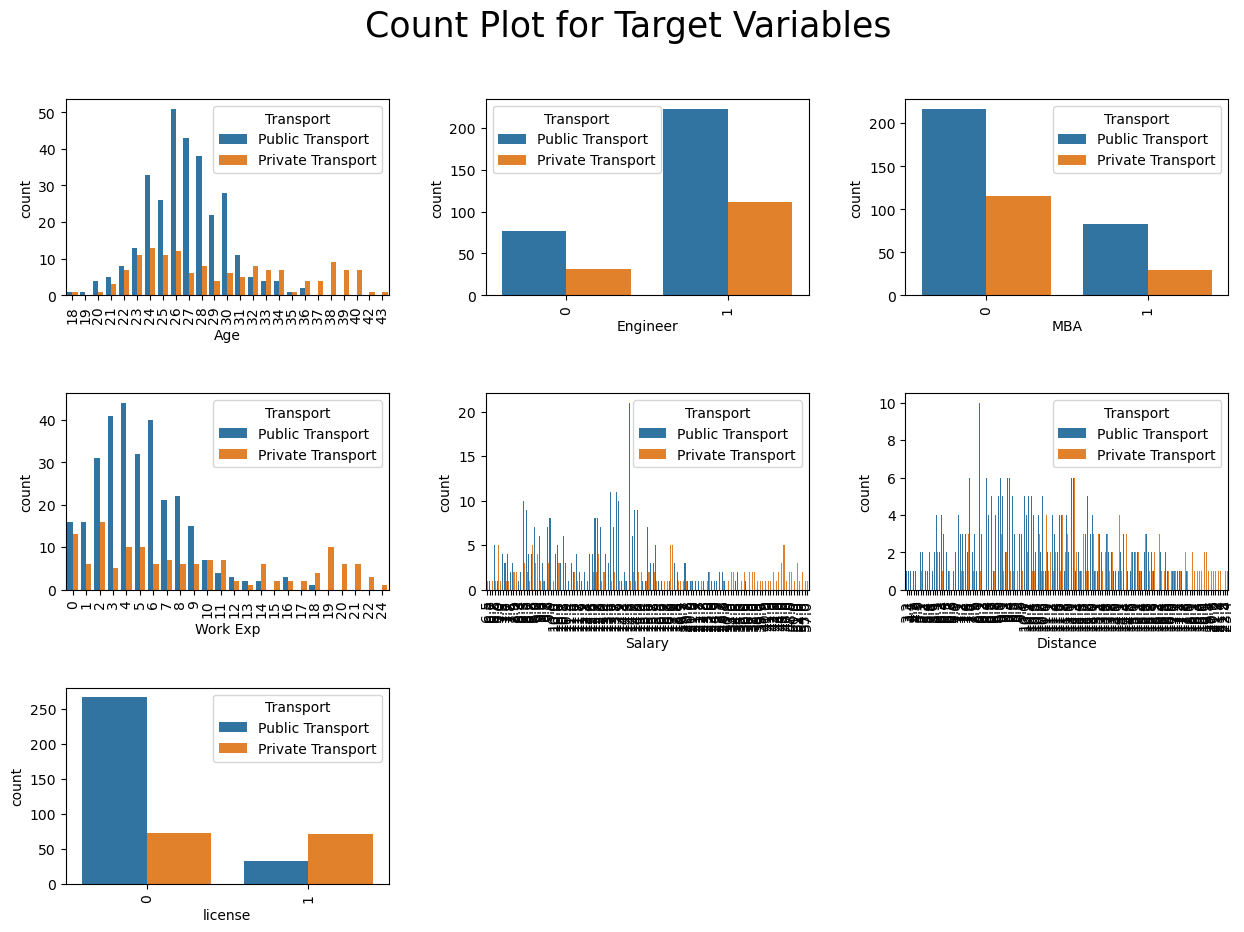

In [18]:
fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for idx, col in enumerate(transport_df.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(9,3,idx+1)
    sns.countplot(x=transport_df[col], hue=transport_df['Transport'],ax=ax1)
    #ax1.set_ylabel(col)
    ax1.tick_params(axis='x', rotation=90)
    
plt.suptitle('Count Plot for Target Variables', fontsize=25)
plt.show()

- **Observation from Countplot**
    - Below Age group 31 years, the number of employees using public transport is more, but above 31 years of age group, the number of employees using private transport is much more.
    - Irrespective of the fact that employees are Engineer or MBAs, the number of employees who use public transport is higher than the number of employee who use private transport
    - As employees grow in experience and probably salaries, the number of employees using public transport starts decreasing and the number of employees using private transport starts increasing.

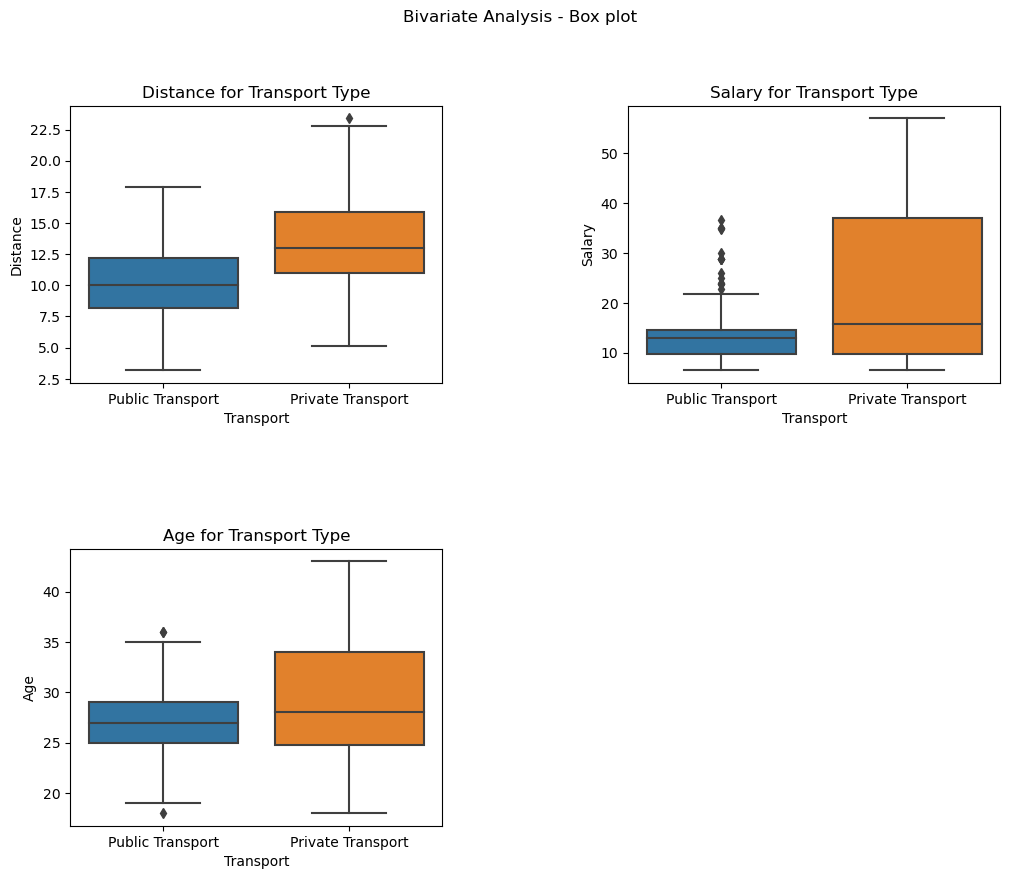

In [19]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Bivariate Analysis - Box plot', fontsize=12)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
sns.boxplot(y=transport_df['Distance'],x=transport_df['Transport'], ax= ax1);
sns.boxplot(data=transport_df, y='Salary',x='Transport' , ax= ax2);
sns.boxplot(data=transport_df, y='Age',x='Transport', ax= ax3);

ax1.title.set_text("Distance for Transport Type")
ax1.tick_params(axis='x', rotation=0)
ax2.title.set_text("Salary for Transport Type")
ax2.tick_params(axis='x', rotation=0)
ax3.title.set_text("Age for Transport Type")
ax3.tick_params(axis='x', rotation=0)

- **Observation from Boxplot - Bivariate Analysis**
    - Employee who use Public transport are travelling lesser distance than the employee who travel in Private transport. Employees prefer Private transport as they have to travel longer than other employees who travel lesser distance.
    - Employees who are younger or are less aged travel in Public Transport and older employees travel by Private transport.
    - Employees who earn less travel by Public transport and employees who earn more travel by Private Transport.

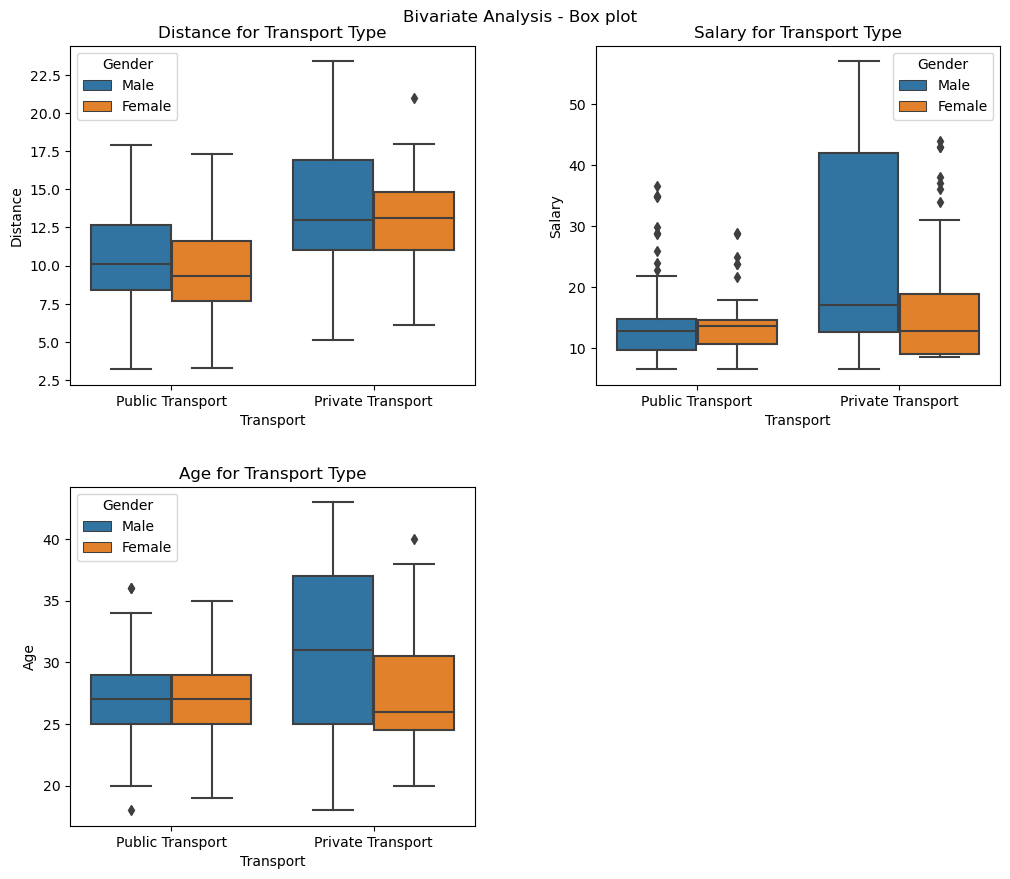

In [20]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3, top=0.95, wspace= 0.3, bottom = 0.3)
fig.suptitle('Bivariate Analysis - Box plot', fontsize=12)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
sns.boxplot(y=transport_df['Distance'],x=transport_df['Transport'], hue=transport_df['Gender'], ax= ax1);
sns.boxplot(data=transport_df, y='Salary',x='Transport', hue=transport_df['Gender'], ax= ax2);
sns.boxplot(data=transport_df, y='Age',x='Transport',hue=transport_df['Gender'], ax= ax3);
ax1.title.set_text("Distance for Transport Type")
ax1.tick_params(axis='x', rotation=0)
ax2.title.set_text("Salary for Transport Type")
ax2.tick_params(axis='x', rotation=0)
ax3.title.set_text("Age for Transport Type")
ax3.tick_params(axis='x', rotation=0)

 - Male Employees travel more distance from private transport than the distance travelled by female employees.
 - On Average, Male and Female employees travel 10 km of distance approx by public transport whereas the distance travelled by Male and Female employees by private transport is 13 km.
 - Employees travelling from private transport earn higher salary (more than 25 lpa) from the employees who travel from public transport.
 - The average age of the males and females employees who travels from public transport is 27 wereas the average age of male employees who travel by private transport is 32 years and average age of female who travel by private transport is 26 years.
 - Employees who are more than 35 years old prefer to travle from private transport

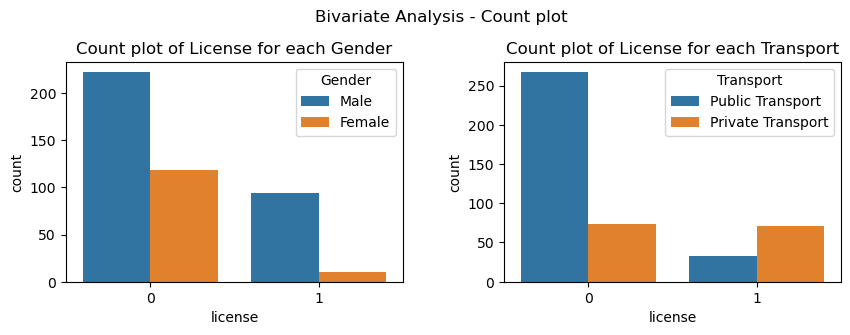

In [21]:
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(hspace=0.3, top=0.85, wspace= 0.3, bottom = 0.3)
fig.suptitle('Bivariate Analysis - Count plot', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x=transport_df['license'], hue=transport_df['Gender'],ax=ax1);
sns.countplot(x=transport_df['license'], hue=transport_df['Transport'],ax=ax2);
ax1.title.set_text("Count plot of License for each Gender")
ax1.tick_params(axis='x', rotation=0)
ax2.title.set_text("Count plot of License for each Transport")
ax2.tick_params(axis='x', rotation=0)

 - The number of male employees who do not have license is more than the number of females employees who do not have license.
 - The number of males employees who have license is more than the number of females employees who have license.
 - The number of employees who use Public Transport and do not have license is more than the number of employees who use Private Transport and do not have license.
 - The number of employees who use Public Transport and have license is approx same as the number of employees who use Private Transport and have license.

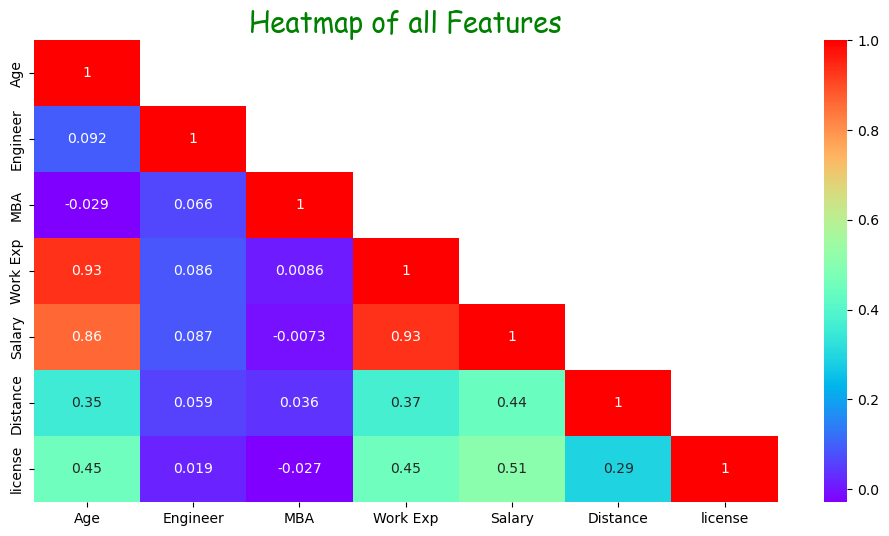

In [22]:
plt.figure(figsize=(12,6))
font = {'family':'cursive','color':'green','size':20}
sns.heatmap(transport_df.corr(), annot=True, cmap='rainbow', mask = np.triu(transport_df.corr(),+1));
plt.title("Heatmap of all Features",fontdict=font);
plt.show();

- **Observation from Heatmap**
    - Age and Salary have very high correlation of 0.86
    - Age and WorkExp have very high correlation of 0.93
    - Work Exp and Salary have very high correlation of 0.93
    - Other features have moderate or low correlation among them.

<Figure size 3000x3000 with 0 Axes>

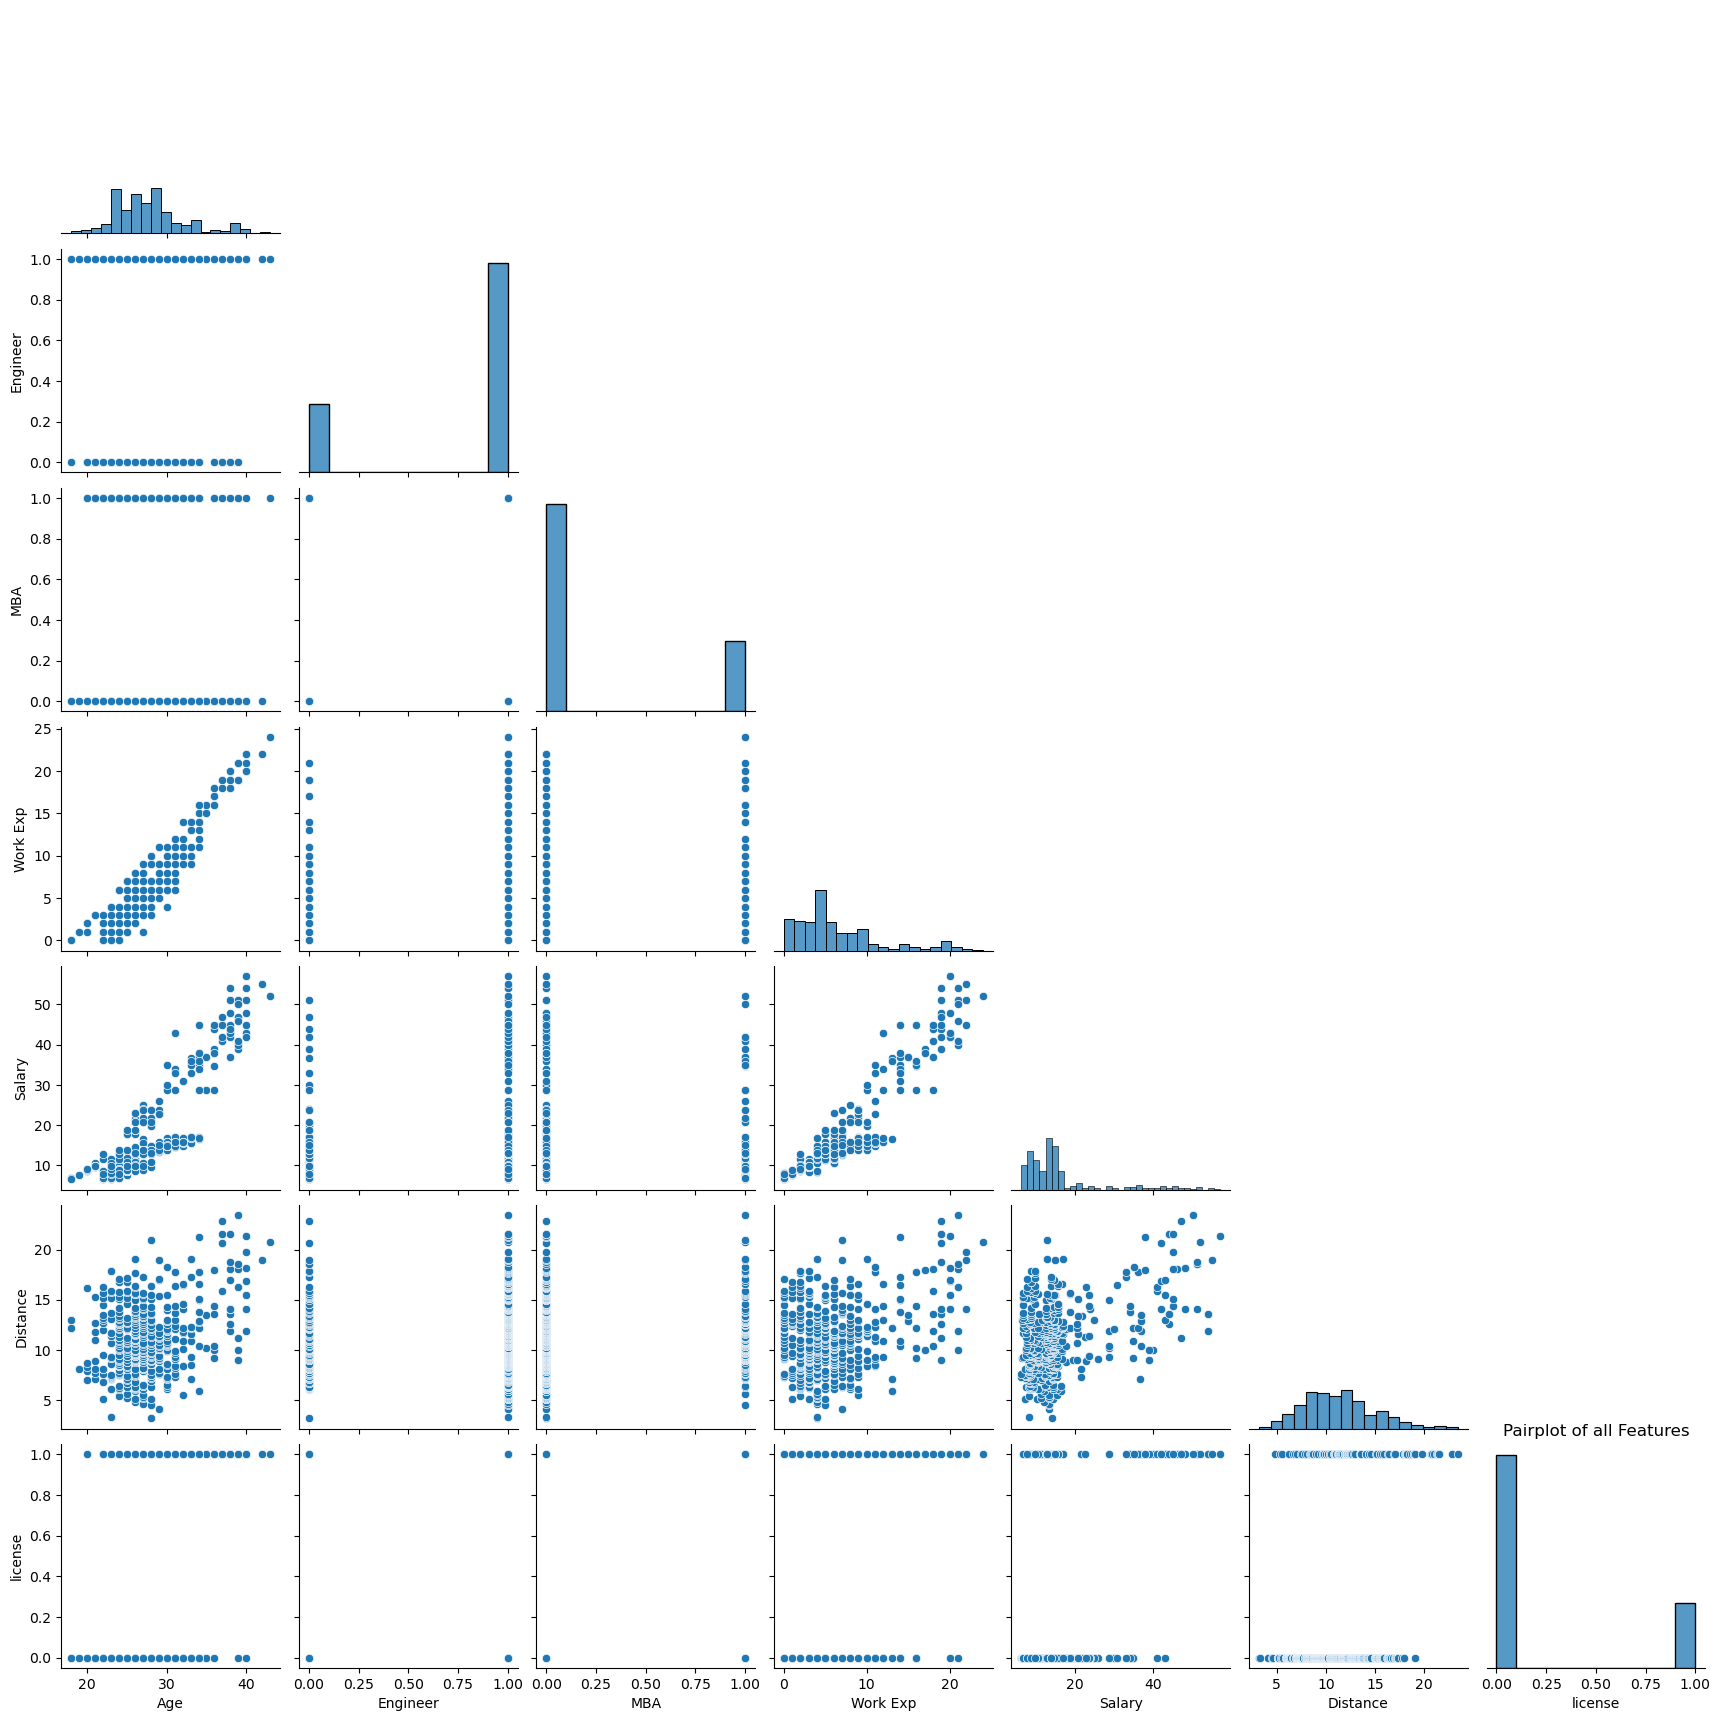

In [23]:
plt.figure(figsize=(30,30))
sns.pairplot(transport_df, corner=True);
plt.title("Pairplot of all Features")
plt.show()

- **Observation from Pairplot**
    - As observed above from heatmap, we can see very high correlation between Age and Salary, Age and WorkExp, and Work Exp and Salary. Other variables have signicantly lower or no correlation.

In [24]:
transport_df[['Transport']].value_counts()

Transport        
Public Transport     300
Private Transport    144
dtype: int64

In [25]:
transport_df[['Gender']].value_counts()

Gender
Male      316
Female    128
dtype: int64

In [26]:
transport_df[['license']].value_counts()

license
0          340
1          104
dtype: int64

#### 1.1.4 Outlier Treatment

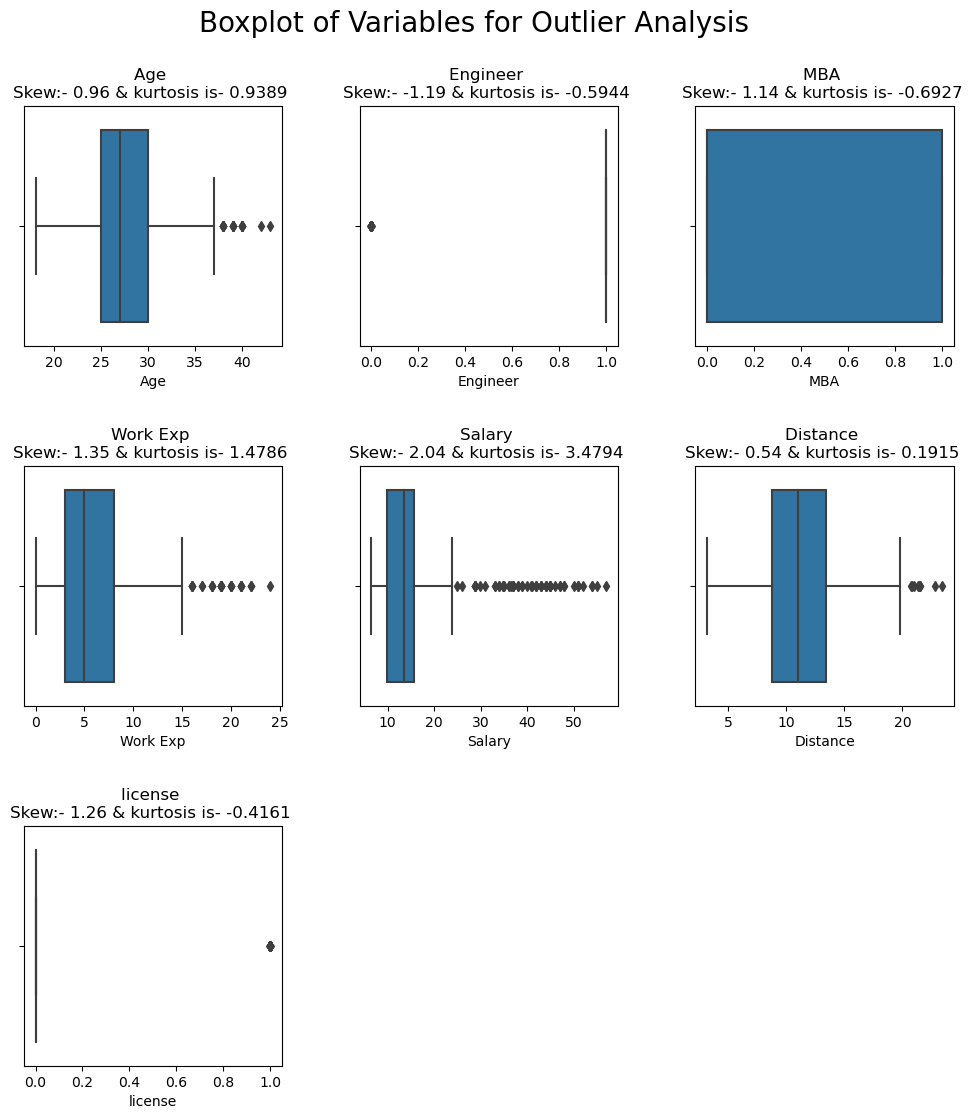

In [27]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.5, top=0.90, wspace= 0.3, bottom = 0.1)
for idx, col in enumerate(transport_df.select_dtypes(exclude='object').columns): #range in number of attributes in the given dataset
    ax = fig.add_subplot(3, 3, idx+1) #adding subplot
    sns.boxplot(x=transport_df[col])
    ax.title.set_text(f'{col} \nSkew:- {round(transport_df[col].skew(),2)} & kurtosis is- {round(transport_df[col].kurtosis(),4)} ')

plt.suptitle('Boxplot of Variables for Outlier Analysis', fontsize=20)
plt.show()

- **Observation from Boxplot**
    - For Engineer, MBA and license, we can observe little odd kind on boxplot. It could be because these features are categorical variable. So, no outlier treatment is required for such features.
    - Age is moderately skewed towards right. There are few ouliers that we can observe but Again these values seems to be genuine in nature and so we are choosing to skip the outlier treatment.
    - Work Exp is skewed towards right and we can see the presence of outliers but these values seems to be genuine in nature and so we can skip the outliers treatment.
    - Salary is rightly skewed and we can observe the presence of many outliers. These ouliers values seems to be genuine when we consider the experience of the employees as well. So, we can skip the outliers treatment in this case.
    - Distance feature is moderately skewed but there are few outliers present. So, in this case, we can skip outliers treatment as the values are genuine and seems to be correct.
    
    - Even though we see some outliers in the salary, distance, work experience features, it is better to keep outliers in this case because these values are not extreme values and are legitimate values. These data have outliers that are little higher than upper limit of values, which doesn't seems to be data quality issue and hence it is acceptable.

#### Observation:
- From the missing matrix plot we can observer that there is no missing values in the dataset given. It strengthens our earlier analysis that there is no missing value in the dataset

- **Observation from Histplot**
    - Age distribution is moderately skewed towards right. The values such as 40 or slightly higher is normal in nature.
    - From Gender, we could see that the no of male employees is much more than that of female employees.
    - From Engineer, we could again observe that employees who are engineers ( 1's) is much more than those who are non-engineers.
    - From MBA, we could observe that employees who are MBAs (1's) is much less than those who are non-MBAs.
    - Work Exp is rightly skewed, but we can see that the number of employees who have more than 10+ years of experience is decreasing. This is again a genuine trends.
    - Salary distribution is also rightly skewed and this is obvious keeping in mind the Work Exp distribution. The distribution seems to be genuine.
    - The distribution for Distance feature is moderately skewed and it follows normal distribution.
    - From license, we can observe that the number of people who have license is much less than the number of people who doesn't have license.
    - From Transport, we can see that the emloyees who use Public Transport is higher than those who use private transport. 

- **Observation from Distplot**
    - The distribution of Age is normal but moderately skewed towards right. The values such as 40 or slightly higher is normal in nature.
    - The distribution of Work Exp is normal but skewed towards right, but we can see that the number of employees who have more than 10+ years of experience is decreasing with slight increase at 20 years. This is again a genuine trends.
    - The distribution of Salary is normal but rightly skewed very smilar to Work Exp distribution. The distribution values seems to be genuine.
    - The distribution for Distance feature is moderately skewed and it follows normal distribution.
    - For Engineer, MAB and license, we can observe that the distribution is not normal. It could be because these variables are categorical in nature.
    
- **Observation from Countplot**
    - Below Age group 31 years, the number of employees using public transport is more, but above 31 years of age group, the number of employees using private transport is much more.
    - Irrespective of the fact that employees are Engineer or MBAs, the number of employees who use public transport is higher than the number of employee who use private transport
    - As employees grow in experience and probably salaries, the number of employees using public transport starts decreasing and the number of employees using private transport starts increasing.
- **Observation from Boxplot - Bivariate Analysis**
    - Employee who use Public transport are travelling lesser distance than the employee who travel in Private transport. Employees prefer Private transport as they have to travel longer than other employees who travel lesser distance.
    - Employees who are younger or are less aged travel in Public Transport and older employees travel by Private transport.
    - Employees who earn less travel by Public transport and employees who earn more travel by Private Transport.

- **Observation from Heatmap**
    - As observed above from heatmap, we can see very high correlation between Age and Salary, Age and WorkExp, and Work Exp and Salary. Other variables have signicantly lower or no correlation.
    
- **Observation from Pairplot**
    - As observed above from scatter plot and heat map
        - Age and Salary have very high correlation of 0.86
        - Age and WorkExp have very high correlation of 0.93
        - Work Exp and Salary have very high correlation of 0.93
        - Other variables have signicantly lower or no correlation

- **Observation From Boxplot**
    - For Engineer, MBA and license, we can observe little odd kind on boxplot. It could be because these features are categorical variable. So, no outlier treatment is required for such features.
    - Age is moderately skewed towards right. There are few ouliers that we can observe but Again these values seems to be genuine in nature and so we are choosing to skip the outlier treatment.
    - Work Exp is skewed towards right and we can see the presence of outliers but these values seems to be genuine in nature and so we can skip the outliers treatment.
    - Salary is rightly skewed and we can observe the presence of many outliers. These ouliers values seems to be genuine when we consider the experience of the employees as well. So, we can skip the outliers treatment in this case.
    - Distance feature is moderately skewed but there are few outliers present. So, in this case, we can skip outliers treatment as the values are genuine and seems to be correct. 
    - Even though we see some outliers in the salary, distance, work experience features, it is better to keep outliers in this case because these values are not extreme values and are legitimate values. These data have outliers that are little higher than upper limit of values, which doesn't seems to be data quality issue and hence it is acceptable.

### 1.2 Split the data into train and test in the ratio 70:30. Is scaling necessary or not?

#### 1.2.1 Encode the data (having string values) for Modelling

In [28]:
transport_df.dtypes

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [29]:
transport_df[['Gender', 'Engineer', 'MBA','license', 'Transport']].nunique()

Gender       2
Engineer     2
MBA          2
license      2
Transport    2
dtype: int64

In [30]:
transport_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
transport_df['Transport'].unique()

array(['Public Transport', 'Private Transport'], dtype=object)

In [32]:
transport_df['Gender']=transport_df["Gender"].replace({'Male':0, 'Female':1})
transport_df['Transport']=transport_df['Transport'].replace({'Public Transport':0,'Private Transport':1})

In [33]:
transport_df['Gender']=transport_df["Gender"].astype('int8')
transport_df['Transport']=transport_df['Transport'].astype('int8')

In [34]:
transport_df.dtypes

Age            int64
Gender          int8
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport       int8
dtype: object

In [35]:
transport_df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,0,0,0,4,14.30,3.20,0,0
1,23,1,1,0,4,8.30,3.30,0,0
2,29,0,1,0,7,13.40,4.10,0,0
3,28,1,1,1,5,13.40,4.50,0,0
4,27,0,1,0,4,13.40,4.60,0,0
5,26,0,1,0,4,12.30,4.80,1,0
6,28,0,1,0,5,14.40,5.10,0,1
7,26,1,1,0,3,10.50,5.10,0,0
8,22,0,1,0,1,7.50,5.10,0,0
9,27,0,1,0,4,13.50,5.20,0,0


In [36]:
transport_df.tail(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
434,40,0,1,0,22,45.00,19.80,1,1
435,37,0,0,0,19,42.00,20.70,1,1
436,43,0,1,1,24,52.00,20.80,1,1
437,28,1,1,1,7,13.00,21.00,1,1
438,34,0,1,0,14,38.00,21.30,1,1
439,40,0,1,0,20,57.00,21.40,1,1
440,38,0,1,0,19,44.00,21.50,1,1
441,37,0,1,0,19,45.00,21.50,1,1
442,37,0,0,0,19,47.00,22.80,1,1
443,39,0,1,1,21,50.00,23.40,1,1


- **Encoded the object datatype variable using custom encoding and converted the datatype from 'object' to 'int'.**

#### 1.2.2 Scaling and Splitting the data and form train and test datasets

In [37]:
X = transport_df.drop('Transport',axis=1)
Y = transport_df['Transport']

In [38]:
X.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28,0,0,0,4,14.30,3.20,0
1,23,1,1,0,4,8.30,3.30,0
2,29,0,1,0,7,13.40,4.10,0
3,28,1,1,1,5,13.40,4.50,0
4,27,0,1,0,4,13.40,4.60,0


In [39]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Transport, dtype: int8

In [40]:
feature_list = ['Age','Work Exp','Salary','Distance']

In [41]:
from scipy.stats import zscore
XScaled=X.copy()
XScaled[feature_list]=XScaled[feature_list].apply(zscore)
XScaled.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,0.06,0,0,0,-0.45,-0.19,-2.26,0
1,-1.08,1,1,0,-0.45,-0.76,-2.23,0
2,0.28,0,1,0,0.14,-0.27,-2.01,0
3,0.06,1,1,1,-0.25,-0.27,-1.89,0
4,-0.17,0,1,0,-0.45,-0.27,-1.87,0


In [42]:
X.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28,0,0,0,4,14.30,3.20,0
1,23,1,1,0,4,8.30,3.30,0
2,29,0,1,0,7,13.40,4.10,0
3,28,1,1,1,5,13.40,4.50,0
4,27,0,1,0,4,13.40,4.60,0


In [43]:
# Split X and y into training and test set in 70:30 ratio
XScaled_train, XScaled_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [44]:
X_train.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
201,29,0,0,0,5,15.90,10.50,0
386,27,0,1,1,6,12.90,15.60,0
329,27,0,1,0,6,12.90,13.30,0
249,23,0,1,0,0,6.90,11.70,0
349,30,0,1,0,7,14.90,14.00,0
127,28,1,1,0,5,14.60,9.00,0
82,19,1,1,0,1,7.50,8.10,0
405,32,1,1,0,14,30.90,16.50,0
311,30,1,1,0,6,15.80,12.90,0
27,25,0,0,0,1,7.60,6.30,0


In [45]:
XScaled.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,0.06,0,0,0,-0.45,-0.19,-2.26,0
1,-1.08,1,1,0,-0.45,-0.76,-2.23,0
2,0.28,0,1,0,0.14,-0.27,-2.01,0
3,0.06,1,1,1,-0.25,-0.27,-1.89,0
4,-0.17,0,1,0,-0.45,-0.27,-1.87,0
5,-0.40,0,1,0,-0.45,-0.38,-1.81,1
6,0.06,0,1,0,-0.25,-0.18,-1.73,0
7,-0.40,1,1,0,-0.65,-0.55,-1.73,0
8,-1.30,0,1,0,-1.04,-0.84,-1.73,0
9,-0.17,0,1,0,-0.45,-0.26,-1.70,0


In [46]:
XScaled_test.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
247,-0.40,1,1,0,0.33,-0.16,0.08,0
179,-0.17,0,0,1,-0.25,-0.22,-0.37,0
186,1.64,1,1,0,1.90,1.19,-0.31,0
31,-0.85,0,1,1,-0.84,-0.73,-1.37,0
218,1.19,0,1,0,0.92,0.04,-0.12,1
223,-0.40,0,1,0,-0.84,-0.73,-0.09,1
430,3.23,0,1,0,3.07,3.71,2.13,1
419,1.42,0,1,1,1.90,1.89,1.80,1
233,0.28,0,1,0,0.92,0.62,-0.01,1
4,-0.17,0,1,0,-0.45,-0.27,-1.87,0


In [47]:
X_test.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
247,26,1,1,0,8,14.60,11.60,0
179,27,0,0,1,5,13.90,10.00,0
186,35,1,1,0,16,28.70,10.20,0
31,24,0,1,1,2,8.60,6.40,0
218,33,0,1,0,11,16.70,10.90,1
223,26,0,1,0,2,8.60,11.00,1
430,42,0,1,0,22,55.00,19.00,1
419,34,0,1,1,16,36.00,17.80,1
233,29,0,1,0,11,22.70,11.30,1
4,27,0,1,0,4,13.40,4.60,0


In [48]:
print('Shape of X Train datasets {}'.format(X_train.shape))
print('Shape of X Test datasets {}'.format(X_test.shape))

print('Shape of X Scaled Train datasets {}'.format(XScaled_train.shape))
print('Shape of X Scaled Test datasets {}'.format(XScaled_test.shape))

Shape of X Train datasets (310, 8)
Shape of X Test datasets (134, 8)
Shape of X Scaled Train datasets (310, 8)
Shape of X Scaled Test datasets (134, 8)


In [49]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    pred_train_prob = model.predict_proba(X_train)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = metrics.roc_auc_score(y_train, pred_train_prob)
    
    pred_test_prob = model.predict_proba(X_test)
    pred_test_prob = pred_test_prob[:,1]
    test_auc = metrics.roc_auc_score(y_test,pred_test_prob)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1,train_auc,test_auc))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("\n\nAccuracy on training set : ",np.round(model.score(X_train,y_train),2))
        print("Accuracy on test set : ",np.round(model.score(X_test,y_test),2))
        print("Recall on training set : ",np.round(metrics.recall_score(y_train,pred_train),2))
        print("Recall on test set : ",np.round(metrics.recall_score(y_test,pred_test),2))
        print("Precision on training set : ",np.round(metrics.precision_score(y_train,pred_train),2))
        print("Precision on test set : ",np.round(metrics.precision_score(y_test,pred_test),2))
        print("F1-Score on training set : ",np.round(metrics.f1_score(y_train,pred_train),2))
        print("F1-Score on test set : ",np.round(metrics.f1_score(y_test,pred_test),2))
        print("ROC AUC Score on training set : ",np.round(metrics.roc_auc_score(y_train,pred_train_prob),2))
        print("ROC AUC Score on test set : ",np.round(metrics.roc_auc_score(y_test,pred_test_prob),2))
    
    return score_list # returning the list with train and test scores

In [50]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_scaled_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(XScaled_train)
    pred_test = model.predict(XScaled_test)
    
    train_acc = model.score(XScaled_train,y_train)
    test_acc = model.score(XScaled_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    pred_train_prob = model.predict_proba(XScaled_train)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = metrics.roc_auc_score(y_train, pred_train_prob)
    
    pred_test_prob = model.predict_proba(XScaled_test)
    pred_test_prob = pred_test_prob[:,1]
    test_auc = metrics.roc_auc_score(y_test,pred_test_prob)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1,train_auc,test_auc))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("\n\nAccuracy on training set : ",np.round(model.score(XScaled_train,y_train),2))
        print("Accuracy on test set : ",np.round(model.score(XScaled_test,y_test),2))
        print("Recall on training set : ",np.round(metrics.recall_score(y_train,pred_train),2))
        print("Recall on test set : ",np.round(metrics.recall_score(y_test,pred_test),2))
        print("Precision on training set : ",np.round(metrics.precision_score(y_train,pred_train),2))
        print("Precision on test set : ",np.round(metrics.precision_score(y_test,pred_test),2))
        print("F1-Score on training set : ",np.round(metrics.f1_score(y_train,pred_train),2))
        print("F1-Score on test set : ",np.round(metrics.f1_score(y_test,pred_test),2))
        print("ROC AUC Score on training set : ",np.round(metrics.roc_auc_score(y_train,pred_train_prob),2))
        print("ROC AUC Score on test set : ",np.round(metrics.roc_auc_score(y_test,pred_test_prob),2))
    
    return score_list # returning the list with train and test scores

#### Observations

 - Encoded the datasets with custom encoding -
     - For Gender - Male is updated as '0' and Female is updated as '1'.
     - For Transport - Public Transport is updated as '0' and Private Transport is updated as '1'
 - Scaling - whether we need to scale this dataset ?
     - Scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform scaling.
     - In the current dataset we have variable "age" with higher magnitude, ranges and units when compared to other variables.
     - So, we need to scale the data when we are trying to use distance based models such as KNN
     - XScaled is the dataset that has been Scaled using zscore from scipy.stats
     - For other models Scaling doesn't play a significant role
 - Splitted the data to training and test datasets using train_test_split from sklearn.model_selection.
 - Noted the shape of out Trained and Test datasets
 - Also created a custom function (get_metrics_score) to get the metrics in a tabular format. 

### 1.3 Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance.: 
###    a. Logistic Regression Model 
###    b. Linear Discriminant Analysis 
###    c. Decision Tree Classifier – CART model 
###    d. Naïve Bayes Model e. KNN Model
###    f. Random Forest Model 
###    g. Boosting Classifier Model using Gradient boost.

#### 1.3.1 Logistic Regression Model

In [51]:
lr_model = LogisticRegression(random_state=123)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=123)

In [52]:
y_lr_train_predicted = lr_model.predict(X_train)
y_lr_test_predicted = lr_model.predict(X_test)

#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model)

print('\nClassification Report for Training Data- \n',classification_report(y_train, y_lr_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lr_test_predicted))
print('Confusion matrix for the train Data- \n',confusion_matrix(y_train, y_lr_train_predicted))
print('\nConfusion matrix for the test Data- \n',confusion_matrix(y_test, y_lr_test_predicted))



Accuracy on training set :  0.8
Accuracy on test set :  0.81
Recall on training set :  0.54
Recall on test set :  0.6
Precision on training set :  0.77
Precision on test set :  0.74
F1-Score on training set :  0.64
F1-Score on test set :  0.66
ROC AUC Score on training set :  0.83
ROC AUC Score on test set :  0.82

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       208
           1       0.77      0.54      0.64       102

    accuracy                           0.80       310
   macro avg       0.79      0.73      0.75       310
weighted avg       0.79      0.80      0.79       310


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        92
           1       0.74      0.60      0.66        42

    accuracy                           0.81       134
   macro avg       0.78      0.75      0.76       134

Training data AUC Score: 0.833
Test data AUC Score: 0.818


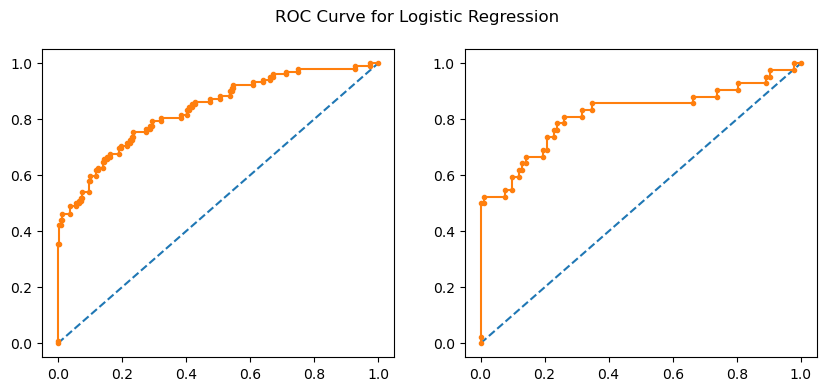

In [53]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Logistic Regression')
lr_train_prob = lr_model.predict_proba(X_train)
lr_train_prob = lr_train_prob[:,1]
lr_auc = roc_auc_score(y_train, lr_train_prob)
print('Training data AUC Score: %.3f' % lr_auc)
fpr, tpr, thresholds = roc_curve(y_train, lr_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

lr_test_prob = lr_model.predict_proba(X_test)
lr_test_prob = lr_test_prob[:,1]
lr_auc = roc_auc_score(y_test, lr_test_prob)
print('Test data AUC Score: %.3f' % lr_auc)
fpr, tpr, thresholds = roc_curve(y_test, lr_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.2 Logistic Regression Tuned

In [54]:
param_grid = {
    'solver': ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs'],
    'penalty': ['l1','l2','None'],
    #'C' : [0.1, 0.01],
    'tol':[0.01],
    'max_iter':[100,1000,10000,100000]
}

lr_tuned = LogisticRegression()

gs_lr = GridSearchCV(estimator = lr_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose=True,
                      n_jobs=-1
                      )

gs_lr.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                    'lbfgs'],
                         'tol': [0.01]},
             verbose=True)

In [55]:
print('Best Params are-', gs_lr.best_params_)
print('\n\nBest Score is-',gs_lr.best_score_)

# Set the clf to the best combination of parameters
gs_lr_tuned = gs_lr.best_estimator_

gs_lr_tuned.fit(X_train, y_train)

y_gs_lr_train_predicted = gs_lr_tuned.predict(X_train)
y_gs_lr_test_predicted = gs_lr_tuned.predict(X_test)

gs_lr_score = get_metrics_score(gs_lr_tuned)

Best Params are- {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}


Best Score is- 0.7901730146875777


Accuracy on training set :  0.79
Accuracy on test set :  0.81
Recall on training set :  0.54
Recall on test set :  0.57
Precision on training set :  0.76
Precision on test set :  0.77
F1-Score on training set :  0.63
F1-Score on test set :  0.66
ROC AUC Score on training set :  0.83
ROC AUC Score on test set :  0.82


In [56]:
# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_lr_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_lr_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_lr_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_lr_test_predicted))

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       208
           1       0.76      0.54      0.63       102

    accuracy                           0.79       310
   macro avg       0.78      0.73      0.74       310
weighted avg       0.79      0.79      0.78       310

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        92
           1       0.77      0.57      0.66        42

    accuracy                           0.81       134
   macro avg       0.80      0.75      0.76       134
weighted avg       0.81      0.81      0.80       134

Confusion matrix for the train data- 
 [[191  17]
 [ 47  55]]

Confusion matrix for the test data- 
 [[85  7]
 [18 24]]


Training data AUC Score: 0.832
Test data AUC Score: 0.821


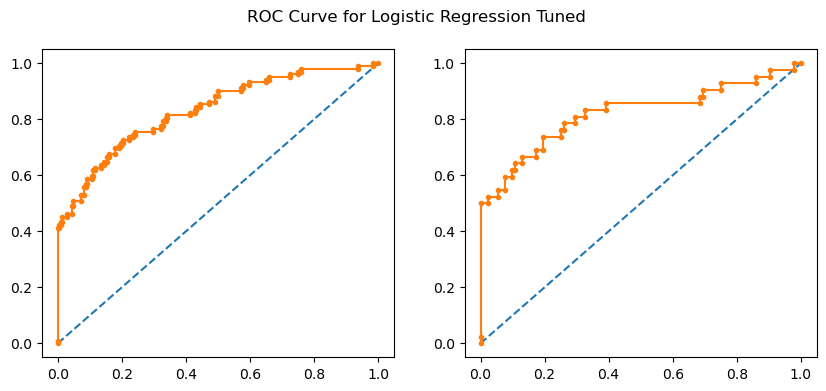

In [57]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Logistic Regression Tuned')

gs_lr_train_prob = gs_lr_tuned.predict_proba(X_train)
gs_lr_train_prob = gs_lr_train_prob[:,1]
gs_lr_auc = roc_auc_score(y_train, gs_lr_train_prob)
print('Training data AUC Score: %.3f' % gs_lr_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_lr_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_lr_test_prob = gs_lr_tuned.predict_proba(X_test)
gs_lr_test_prob = gs_lr_test_prob[:,1]
gs_lr_auc = roc_auc_score(y_test, gs_lr_test_prob)
print('Test data AUC Score: %.3f' % gs_lr_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_lr_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.3 LDA (Linear Discriminant Analysis) 

In [58]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [59]:
y_lda_train_predicted = lda_model.predict(X_train)
y_lda_test_predicted = lda_model.predict(X_test)

#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model)

print('\nClassification Report for Training Data- \n',classification_report(y_train, y_lda_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lda_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_lda_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_lda_test_predicted))



Accuracy on training set :  0.8
Accuracy on test set :  0.82
Recall on training set :  0.56
Recall on test set :  0.62
Precision on training set :  0.77
Precision on test set :  0.76
F1-Score on training set :  0.65
F1-Score on test set :  0.68
ROC AUC Score on training set :  0.83
ROC AUC Score on test set :  0.81

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       208
           1       0.77      0.56      0.65       102

    accuracy                           0.80       310
   macro avg       0.79      0.74      0.75       310
weighted avg       0.80      0.80      0.79       310


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        92
           1       0.76      0.62      0.68        42

    accuracy                           0.82       134
   macro avg       0.80      0.77      0.78       13

Training data AUC Score: 0.834
Test data AUC Score: 0.810


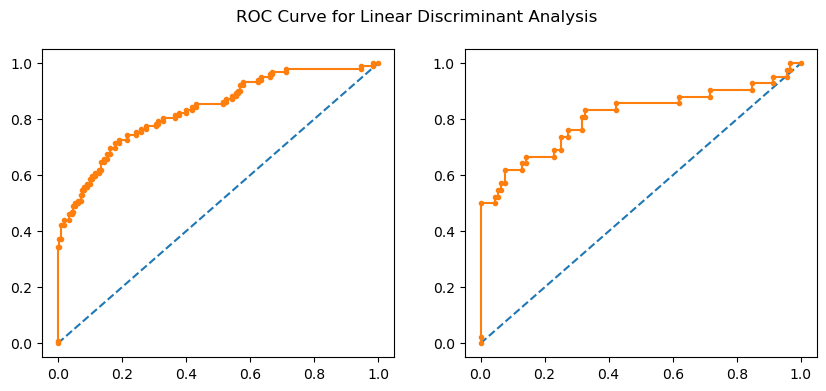

In [60]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Linear Discriminant Analysis')

lda_train_prob = lda_model.predict_proba(X_train)
lda_train_prob = lda_train_prob[:,1]
lda_auc = roc_auc_score(y_train, lda_train_prob)
print('Training data AUC Score: %.3f' % lda_auc)
fpr, tpr, thresholds = roc_curve(y_train, lda_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

lda_test_prob = lda_model.predict_proba(X_test)
lda_test_prob = lda_test_prob[:,1]
lda_auc = roc_auc_score(y_test, lda_test_prob)
print('Test data AUC Score: %.3f' % lda_auc)
fpr, tpr, thresholds = roc_curve(y_test, lda_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.4 LDA Tuned

In [61]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'n_components': [1],
    'shrinkage' : [0.1, 0.01, 0.001, 0.0015,0.0001],
    'tol' : [0.01,0.001,0.0001,0.00001,0.000001]
}

lda_tuned = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(estimator = lda_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      refit=True,
                      verbose=True,
                      return_train_score = True
                      )

gs_lda.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [1],
                         'shrinkage': [0.1, 0.01, 0.001, 0.0015, 0.0001],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             return_train_score=True, verbose=True)

In [62]:
print('Best Params are-', gs_lda.best_params_)
print('\n\nBest Score is-',gs_lda.best_score_)

# Set the clf to the best combination of parameters
gs_lda_tuned = gs_lda.best_estimator_

gs_lda_tuned.fit(X_train, y_train)

y_gs_lda_train_predicted = gs_lda_tuned.predict(X_train)

y_gs_lda_test_predicted = gs_lda_tuned.predict(X_test)
gs_lda_score = get_metrics_score(gs_lda_tuned)

Best Params are- {'n_components': 1, 'shrinkage': 0.001, 'solver': 'lsqr', 'tol': 0.01}


Best Score is- 0.7934092606422704


Accuracy on training set :  0.79
Accuracy on test set :  0.81
Recall on training set :  0.51
Recall on test set :  0.55
Precision on training set :  0.79
Precision on test set :  0.77
F1-Score on training set :  0.62
F1-Score on test set :  0.64
ROC AUC Score on training set :  0.83
ROC AUC Score on test set :  0.81


In [63]:
# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_lda_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_lda_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_lda_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_lda_test_predicted))


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       208
           1       0.79      0.51      0.62       102

    accuracy                           0.79       310
   macro avg       0.79      0.72      0.74       310
weighted avg       0.79      0.79      0.78       310

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        92
           1       0.77      0.55      0.64        42

    accuracy                           0.81       134
   macro avg       0.79      0.74      0.75       134
weighted avg       0.80      0.81      0.80       134

Confusion matrix for the train data- 
 [[194  14]
 [ 50  52]]

Confusion matrix for the test data- 
 [[85  7]
 [19 23]]


Training data AUC Score: 0.833
Test data AUC Score: 0.814


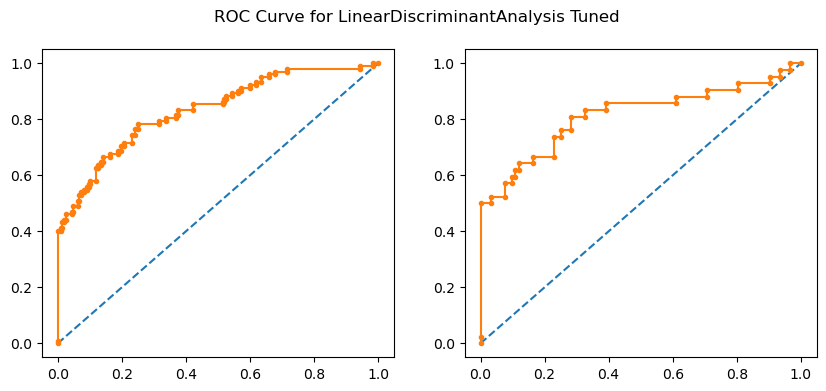

In [64]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for LinearDiscriminantAnalysis Tuned')
gs_lda_train_prob = gs_lda_tuned.predict_proba(X_train)
gs_lda_train_prob = gs_lda_train_prob[:,1]
gs_lda_auc = roc_auc_score(y_train, gs_lda_train_prob)
print('Training data AUC Score: %.3f' % gs_lda_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_lda_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_lda_test_prob = gs_lda_tuned.predict_proba(X_test)
gs_lda_test_prob = gs_lda_test_prob[:,1]
gs_lda_auc = roc_auc_score(y_test, gs_lda_test_prob)
print('Test data AUC Score: %.3f' % gs_lda_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_lda_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.5 Naive Bayes Model

In [65]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

GaussianNB()

In [66]:
# make predictions for train data
y_gnb_train_predicted = GNB_model.predict(X_train)
# make predictions for test data
y_gnb_test_predicted = GNB_model.predict(X_test)
#Using above defined function to get accuracy, recall and precision on train and test set
gnb_score=get_metrics_score(GNB_model)

# summarize the fit of the model
print('\nClassification Report for Training Data- \n',classification_report(y_train, y_gnb_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_gnb_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gnb_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gnb_test_predicted))



Accuracy on training set :  0.79
Accuracy on test set :  0.79
Recall on training set :  0.5
Recall on test set :  0.52
Precision on training set :  0.8
Precision on test set :  0.73
F1-Score on training set :  0.61
F1-Score on test set :  0.61
ROC AUC Score on training set :  0.8
ROC AUC Score on test set :  0.78

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       208
           1       0.80      0.50      0.61       102

    accuracy                           0.79       310
   macro avg       0.79      0.72      0.74       310
weighted avg       0.79      0.79      0.78       310


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        92
           1       0.73      0.52      0.61        42

    accuracy                           0.79       134
   macro avg       0.77      0.72      0.73       134


Training data AUC Score: 0.798
Test data AUC Score: 0.781


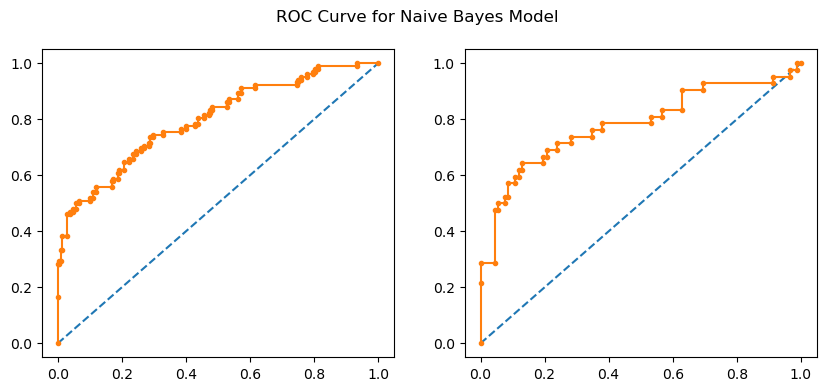

In [67]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Naive Bayes Model')
gnb_train_prob = GNB_model.predict_proba(X_train)
gnb_train_prob = gnb_train_prob[:,1]
gnb_auc = roc_auc_score(y_train, gnb_train_prob)
print('Training data AUC Score: %.3f' % gnb_auc)
fpr, tpr, thresholds = roc_curve(y_train, gnb_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gnb_test_prob = GNB_model.predict_proba(X_test)
gnb_test_prob = gnb_test_prob[:,1]
gnb_auc = roc_auc_score(y_test, gnb_test_prob)
print('Test data AUC Score: %.3f' % gnb_auc)
fpr, tpr, thresholds = roc_curve(y_test, gnb_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.6. Naive Bayes Tuned

In [68]:
param_grid = {
    'var_smoothing': np.logspace(0,-9,num=100)
}

gnb_tuned = GaussianNB()

gs_gnb = GridSearchCV(estimator = gnb_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      refit=True,
                      return_train_score = True
                      )

gs_gnb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True)

In [69]:
print('Best Params are-', gs_gnb.best_params_)
print('\nBest Score is-',gs_gnb.best_score_)

# Set the clf to the best combination of parameters
gs_gnb_tuned = gs_gnb.best_estimator_

gs_gnb_tuned.fit(X_train, y_train)

y_gs_gnb_train_predicted = gs_gnb_tuned.predict(X_train)

y_gs_gnb_test_predicted = gs_gnb_tuned.predict(X_test)

gs_gnb_score = get_metrics_score(gs_gnb_tuned)

Best Params are- {'var_smoothing': 0.0002848035868435802}

Best Score is- 0.7966455065969629


Accuracy on training set :  0.79
Accuracy on test set :  0.81
Recall on training set :  0.46
Recall on test set :  0.5
Precision on training set :  0.84
Precision on test set :  0.84
F1-Score on training set :  0.59
F1-Score on test set :  0.63
ROC AUC Score on training set :  0.8
ROC AUC Score on test set :  0.78


In [70]:
# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_gnb_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_gnb_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_gnb_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_gnb_test_predicted))


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       208
           1       0.84      0.46      0.59       102

    accuracy                           0.79       310
   macro avg       0.81      0.71      0.73       310
weighted avg       0.80      0.79      0.77       310

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        92
           1       0.84      0.50      0.63        42

    accuracy                           0.81       134
   macro avg       0.82      0.73      0.75       134
weighted avg       0.82      0.81      0.80       134

Confusion matrix for the train data- 
 [[199   9]
 [ 55  47]]

Confusion matrix for the test data- 
 [[88  4]
 [21 21]]


Training data AUC Score: 0.797
Test data AUC Score: 0.785


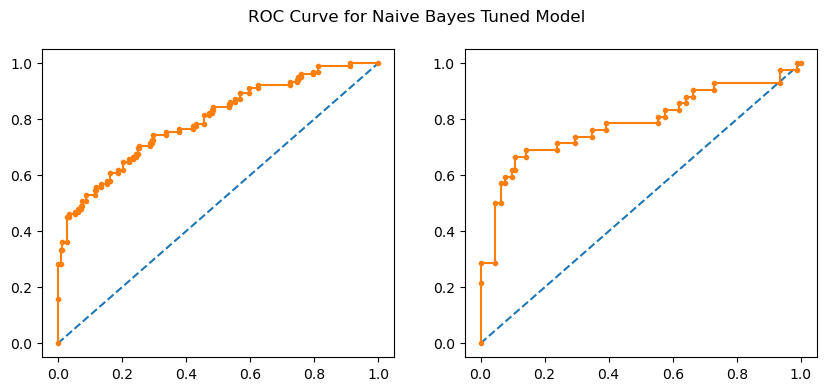

In [71]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Naive Bayes Tuned Model')

gs_gnb_train_prob = gs_gnb_tuned.predict_proba(X_train)
gs_gnb_train_prob = gs_gnb_train_prob[:,1]
gs_gnb_auc = roc_auc_score(y_train, gs_gnb_train_prob)
print('Training data AUC Score: %.3f' % gs_gnb_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_gnb_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_gnb_test_prob = gs_gnb_tuned.predict_proba(X_test)
gs_gnb_test_prob = gs_gnb_test_prob[:,1]
gs_gnb_auc = roc_auc_score(y_test, gs_gnb_test_prob)
print('Test data AUC Score: %.3f' % gs_gnb_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_gnb_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.7 KNN Model

In [72]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
NNH_model = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH_model.fit(XScaled_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [73]:
# make predictions for train data
y_nhh_train_predicted = NNH_model.predict(XScaled_train)

# make predictions for test data
y_nhh_test_predicted = NNH_model.predict(XScaled_test)
gnb_score=get_scaled_metrics_score(NNH_model)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_nhh_train_predicted))
print('\nClassification report for the test data \n',classification_report(y_test, y_nhh_test_predicted))
print('\nConfusion matrix for the train data- \n',confusion_matrix(y_train, y_nhh_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_nhh_test_predicted))



Accuracy on training set :  1.0
Accuracy on test set :  0.8
Recall on training set :  1.0
Recall on test set :  0.52
Precision on training set :  1.0
Precision on test set :  0.76
F1-Score on training set :  1.0
F1-Score on test set :  0.62
ROC AUC Score on training set :  1.0
ROC AUC Score on test set :  0.77

Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       102

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for the test data 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        92
           1       0.76      0.52      0.62        42

    accuracy                           0.80       134
   macro avg       0.78      0.72      0.74       1

Training data AUC Score: 1.000
Test data AUC Score: 0.771


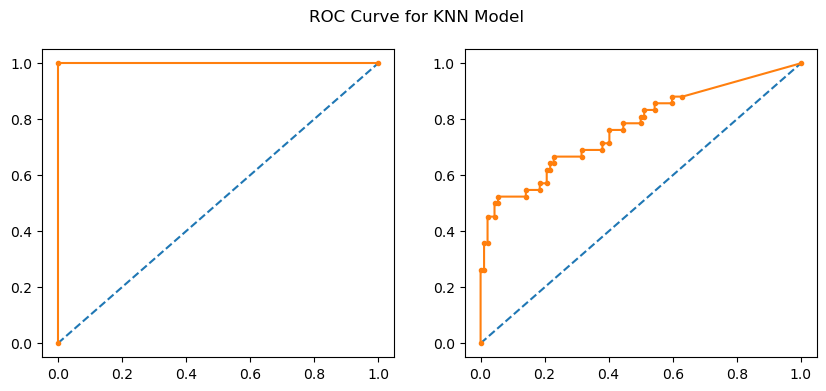

In [74]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for KNN Model')
nhh_train_prob = NNH_model.predict_proba(XScaled_train)
nhh_train_prob = nhh_train_prob[:,1]
nhh_auc = roc_auc_score(y_train, nhh_train_prob)
print('Training data AUC Score: %.3f' % nhh_auc)
fpr, tpr, thresholds = roc_curve(y_train, nhh_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

nhh_test_prob = NNH_model.predict_proba(XScaled_test)
nhh_test_prob = nhh_test_prob[:,1]
nhh_auc = roc_auc_score(y_test, nhh_test_prob)
print('Test data AUC Score: %.3f' % nhh_auc)
fpr, tpr, thresholds = roc_curve(y_test, nhh_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.8 KNN Model Tuned

In [75]:
param_grid = {
    'n_neighbors': [5,7,13,15,17,19],
    'weights': ['distance'],  #'uniform',
    'metric' : ['minkowski','euclidean','manhattan']
}

NNH_tuned = KNeighborsClassifier()

gs_knn = GridSearchCV(estimator = NNH_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True
                      )

gs_knn.fit(XScaled_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 13, 15, 17, 19],
                         'weights': ['distance']},
             return_train_score=True, verbose=1)

In [76]:
print('Best Params are-', gs_knn.best_params_)
print('\nBest Score is-',gs_knn.best_score_)

# Set the clf to the best combination of parameters
gs_knn_tuned = gs_knn.best_estimator_

gs_knn_tuned.fit(XScaled_train, y_train)

y_gs_nhh_train_predicted = gs_knn_tuned.predict(XScaled_train)
y_gs_nhh_test_predicted = gs_knn_tuned.predict(XScaled_test)

gs_knn_score=get_scaled_metrics_score(gs_knn_tuned)

Best Params are- {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

Best Score is- 0.8160941000746825


Accuracy on training set :  1.0
Accuracy on test set :  0.8
Recall on training set :  1.0
Recall on test set :  0.5
Precision on training set :  1.0
Precision on test set :  0.78
F1-Score on training set :  1.0
F1-Score on test set :  0.61
ROC AUC Score on training set :  1.0
ROC AUC Score on test set :  0.81


In [77]:
# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_nhh_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_nhh_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_nhh_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_nhh_test_predicted))

Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       102

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        92
           1       0.78      0.50      0.61        42

    accuracy                           0.80       134
   macro avg       0.79      0.72      0.74       134
weighted avg       0.80      0.80      0.78       134

Confusion matrix for the train data- 
 [[208   0]
 [  0 102]]

Confusion matrix for the test data- 
 [[86  6]
 [21 21]]


Training data AUC Score: 1.000
Test data AUC Score: 0.806


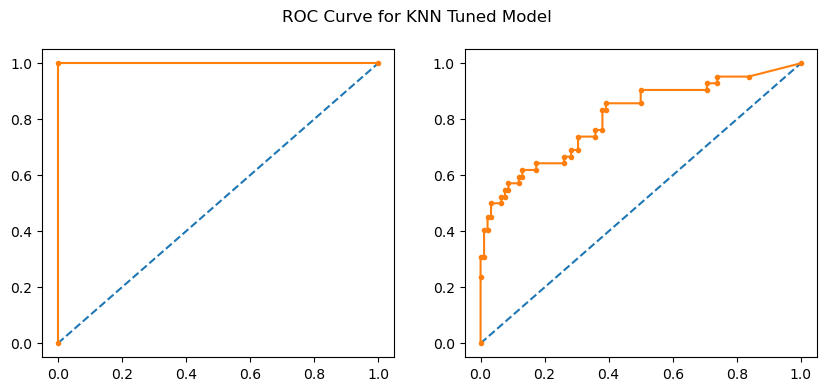

In [78]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for KNN Tuned Model')
gs_nhh_train_prob = gs_knn_tuned.predict_proba(XScaled_train)
gs_nhh_train_prob = gs_nhh_train_prob[:,1]
gs_nhh_auc = roc_auc_score(y_train, gs_nhh_train_prob)
print('Training data AUC Score: %.3f' % gs_nhh_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_nhh_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_nhh_test_prob = gs_knn_tuned.predict_proba(XScaled_test)
gs_nhh_test_prob = gs_nhh_test_prob[:,1]
gs_nhh_auc = roc_auc_score(y_test, gs_nhh_test_prob)
print('Test data AUC Score: %.3f' % gs_nhh_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_nhh_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.9 Decision Tree Classifier - CART Model

In [79]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [80]:
y_dt_train_predicted = dt_model.predict(X_train)
y_dt_test_predicted = dt_model.predict(X_test)
dt_score=get_metrics_score(dt_model)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_dt_train_predicted))
print('\nClassification report for the test data \n',classification_report(y_test, y_dt_test_predicted))
print('\nConfusion matrix for the train data- \n',confusion_matrix(y_train, y_dt_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_dt_test_predicted))



Accuracy on training set :  1.0
Accuracy on test set :  0.8
Recall on training set :  1.0
Recall on test set :  0.74
Precision on training set :  1.0
Precision on test set :  0.66
F1-Score on training set :  1.0
F1-Score on test set :  0.7
ROC AUC Score on training set :  1.0
ROC AUC Score on test set :  0.78

Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       102

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310


Classification report for the test data 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        92
           1       0.66      0.74      0.70        42

    accuracy                           0.80       134
   macro avg       0.77      0.78      0.77       13

Training data AUC Score: 1.000
Test data AUC Score: 0.782


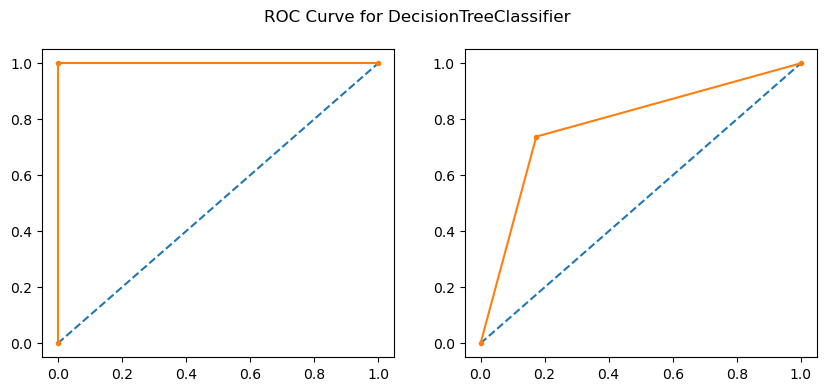

In [81]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for DecisionTreeClassifier')

dt_train_prob = dt_model.predict_proba(X_train)
dt_train_prob = dt_train_prob[:,1]
dt_auc = roc_auc_score(y_train, dt_train_prob)
print('Training data AUC Score: %.3f' % dt_auc)
fpr, tpr, thresholds = roc_curve(y_train, dt_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

dt_test_prob = dt_model.predict_proba(X_test)
dt_test_prob = dt_test_prob[:,1]
dt_auc = roc_auc_score(y_test, dt_test_prob)
print('Test data AUC Score: %.3f' % dt_auc)
fpr, tpr, thresholds = roc_curve(y_test, dt_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.10 Decision Tree Classifier - CART Model Tuned

In [82]:
param_grid = {
        'max_depth' : [10,15,20,25,30],  #maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12,15,30,35], # minimum sample number to split a node
        'min_samples_leaf' : [9,12,15,18,21,24],
        'criterion' :['gini','entropy']
}

dt_tuned = DecisionTreeClassifier(random_state=2)  

gs_dt = GridSearchCV(estimator = dt_tuned, 
                      param_grid = param_grid, 
                      cv = 5,
                      verbose = True,
                      n_jobs= -1
                      )

gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35]},
             verbose=True)

In [83]:
print('Best Params are-', gs_dt.best_params_)
print('\n\nBest Score is-',gs_dt.best_score_)

# Set the clf to the best combination of parameters
gs_dt_tuned = gs_dt.best_estimator_

gs_dt_tuned.fit(X_train, y_train)

y_gs_dt_train_predicted = gs_dt_tuned.predict(X_train)

y_gs_dt_test_predicted = gs_dt_tuned.predict(X_test)

dt_score=get_metrics_score(gs_dt_tuned)

Best Params are- {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}


Best Score is- 0.7903225806451613


Accuracy on training set :  0.87
Accuracy on test set :  0.83
Recall on training set :  0.77
Recall on test set :  0.74
Precision on training set :  0.82
Precision on test set :  0.72
F1-Score on training set :  0.8
F1-Score on test set :  0.73
ROC AUC Score on training set :  0.94
ROC AUC Score on test set :  0.86


Text(0.5, 1.0, 'Important Features in the Decision Tree Tuned Models ')

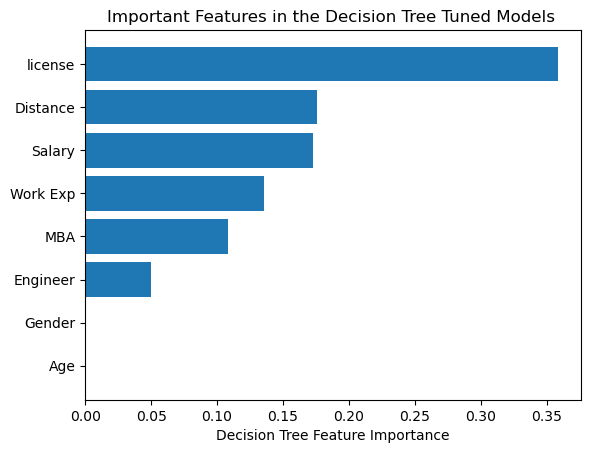

In [84]:
sorted_idx = gs_dt_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_dt_tuned.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.title("Important Features in the Decision Tree Tuned Models ")

In [85]:
# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_dt_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_dt_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_dt_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_dt_test_predicted))

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       208
           1       0.82      0.77      0.80       102

    accuracy                           0.87       310
   macro avg       0.86      0.85      0.85       310
weighted avg       0.87      0.87      0.87       310

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        92
           1       0.72      0.74      0.73        42

    accuracy                           0.83       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.83      0.83      0.83       134

Confusion matrix for the train data- 
 [[191  17]
 [ 23  79]]

Confusion matrix for the test data- 
 [[80 12]
 [11 31]]


Training data AUC Score: 0.940
Test data AUC Score: 0.864


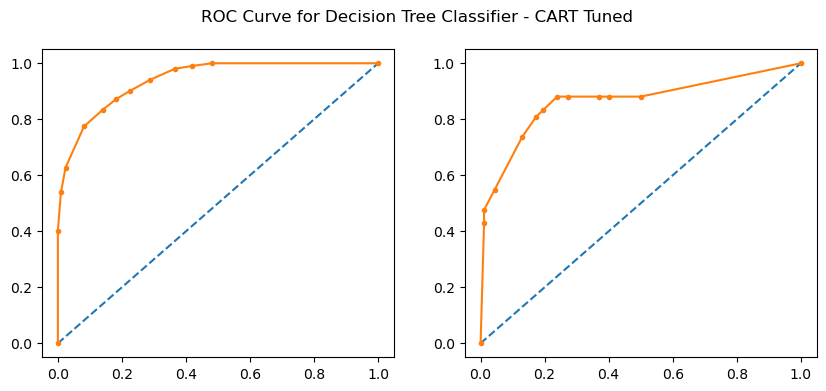

In [86]:
fig=plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Decision Tree Classifier - CART Tuned')
gs_dt_train_prob = gs_dt_tuned.predict_proba(X_train)
gs_dt_train_prob = gs_dt_train_prob[:,1]
gs_dt_auc = roc_auc_score(y_train, gs_dt_train_prob)
print('Training data AUC Score: %.3f' % gs_dt_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_dt_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_dt_test_prob = gs_dt_tuned.predict_proba(X_test)
gs_dt_test_prob = gs_dt_test_prob[:,1]
gs_dt_auc = roc_auc_score(y_test, gs_dt_test_prob)
print('Test data AUC Score: %.3f' % gs_dt_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_dt_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.11 Random Forest Classifier

In [87]:
RF_model=RandomForestClassifier(max_depth=7,max_features=5,min_samples_leaf=10,min_samples_split=25,n_estimators=40,
                                random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=10,
                       min_samples_split=25, n_estimators=40, random_state=1)

In [88]:
y_rf_train_predicted = RF_model.predict(X_train)
y_rf_test_predicted = RF_model.predict(X_test)
rf_score=get_metrics_score(RF_model)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_rf_train_predicted))
print('\nClassification report for the test data \n',classification_report(y_test, y_rf_test_predicted))
print('\nConfusion matrix for the train data- \n',confusion_matrix(y_train, y_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_rf_test_predicted))



Accuracy on training set :  0.86
Accuracy on test set :  0.81
Recall on training set :  0.66
Recall on test set :  0.55
Precision on training set :  0.88
Precision on test set :  0.79
F1-Score on training set :  0.75
F1-Score on test set :  0.65
ROC AUC Score on training set :  0.92
ROC AUC Score on test set :  0.81

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       208
           1       0.88      0.66      0.75       102

    accuracy                           0.86       310
   macro avg       0.87      0.81      0.83       310
weighted avg       0.86      0.86      0.85       310


Classification report for the test data 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        92
           1       0.79      0.55      0.65        42

    accuracy                           0.81       134
   macro avg       0.81      0.74      0.76  

Training data AUC Score: 0.925
Test data AUC Score: 0.808


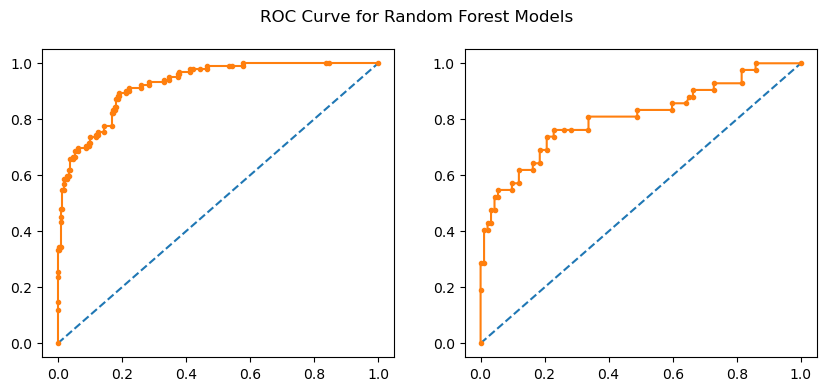

In [89]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Random Forest Models')
rf_train_prob = RF_model.predict_proba(X_train)
rf_train_prob = rf_train_prob[:,1]
rf_auc = roc_auc_score(y_train, rf_train_prob)
print('Training data AUC Score: %.3f' % rf_auc)
fpr, tpr, thresholds = roc_curve(y_train, rf_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')


rf_test_prob = RF_model.predict_proba(X_test)
rf_test_prob = rf_test_prob[:,1]
rf_auc = roc_auc_score(y_test, rf_test_prob)
print('Test data AUC Score: %.3f' % rf_auc)
fpr, tpr, thresholds = roc_curve(y_test, rf_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.12. Random Forest Tuned

In [90]:
param_grid = {
        #'max_depth': [5,7,9,11,13],
        'max_features': [3,5,7,9],
        'n_estimators': [25,30,35], # number of trees in the random forest
        'max_depth' : [5,7,10,15], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12], #,15,20,25,30, # minimum sample number to split a node
        'min_samples_leaf' : [10,12,15,18] # minimum sample number that can be stored in a leaf node
}

rf_tuned = RandomForestClassifier(random_state=123)

gs_rf = GridSearchCV(estimator = rf_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = True,
                      n_jobs= -1
                      )

gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [10, 12, 15, 18],
                         'min_samples_split': [3, 6, 9, 12],
                         'n_estimators': [25, 30, 35]},
             verbose=True)

In [91]:
print('Best Params are-', gs_rf.best_params_)
print('\n\nBest Score is-',gs_rf.best_score_)

# Set the clf to the best combination of parameters
gs_rf_tuned = gs_rf.best_estimator_

gs_rf_tuned.fit(X_train, y_train)

y_gs_rf_train_predicted = gs_rf_tuned.predict(X_train)

y_gs_rf_test_predicted = gs_rf_tuned.predict(X_test)

gs_rf_score = get_metrics_score(gs_rf_tuned)

Best Params are- {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 35}


Best Score is- 0.8224732387353746


Accuracy on training set :  0.87
Accuracy on test set :  0.81
Recall on training set :  0.68
Recall on test set :  0.6
Precision on training set :  0.9
Precision on test set :  0.76
F1-Score on training set :  0.77
F1-Score on test set :  0.67
ROC AUC Score on training set :  0.93
ROC AUC Score on test set :  0.83


In [92]:
# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_rf_train_predicted))
print('\nClassification report for the test data \n',classification_report(y_test, y_gs_rf_test_predicted))
print('\nConfusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_rf_test_predicted))


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       208
           1       0.90      0.68      0.77       102

    accuracy                           0.87       310
   macro avg       0.88      0.82      0.84       310
weighted avg       0.87      0.87      0.86       310


Classification report for the test data 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        92
           1       0.76      0.60      0.67        42

    accuracy                           0.81       134
   macro avg       0.79      0.75      0.77       134
weighted avg       0.81      0.81      0.81       134


Confusion matrix for the train data- 
 [[200   8]
 [ 33  69]]

Confusion matrix for the test data- 
 [[84  8]
 [17 25]]


Training data AUC Score: 0.935
Test data AUC Score: 0.826


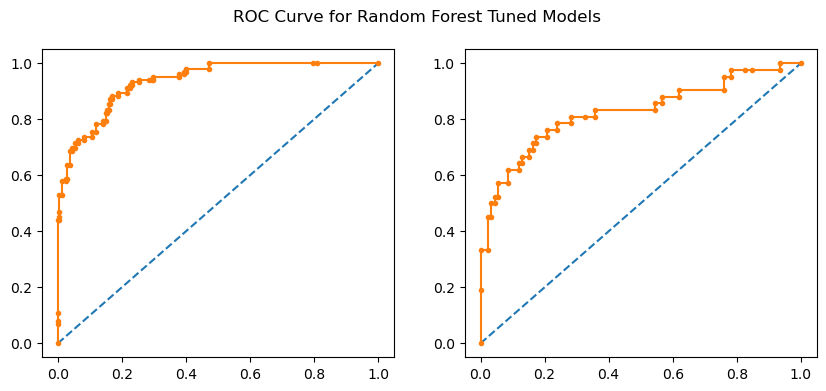

In [93]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Random Forest Tuned Models')
gs_rf_train_prob = gs_rf_tuned.predict_proba(X_train)
gs_rf_train_prob = gs_rf_train_prob[:,1]
gs_rf_auc = roc_auc_score(y_train, gs_rf_train_prob)
print('Training data AUC Score: %.3f' % gs_rf_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_rf_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_rf_test_prob = gs_rf_tuned.predict_proba(X_test)
gs_rf_test_prob = gs_rf_test_prob[:,1]
gs_rf_auc = roc_auc_score(y_test, gs_rf_test_prob)
print('Test data AUC Score: %.3f' % gs_rf_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_rf_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.13 Gradient Boosting

In [94]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [95]:
# make predictions for train data
y_gbc_train_predicted = gbc_model.predict(XScaled_train)

# make predictions for test data
y_gbc_test_predicted = gbc_model.predict(XScaled_test)
gbc_score=get_metrics_score(gbc_model)

# summarize the fit of the model
print('\nClassification Report for Training Data- \n',classification_report(y_train, y_gbc_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_gbc_test_predicted))
print('\nConfusion Matrix for Training Data- \n',confusion_matrix(y_train, y_gbc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_gbc_test_predicted))



Accuracy on training set :  0.97
Accuracy on test set :  0.77
Recall on training set :  0.91
Recall on test set :  0.6
Precision on training set :  0.99
Precision on test set :  0.64
F1-Score on training set :  0.95
F1-Score on test set :  0.62
ROC AUC Score on training set :  1.0
ROC AUC Score on test set :  0.81

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       208
           1       0.00      0.00      0.00       102

    accuracy                           0.67       310
   macro avg       0.34      0.50      0.40       310
weighted avg       0.45      0.67      0.54       310


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        92
           1       0.00      0.00      0.00        42

    accuracy                           0.69       134
   macro avg       0.34      0.50      0.41       134

Training data AUC Score:: 0.998
Test data AUC Score: 0.812


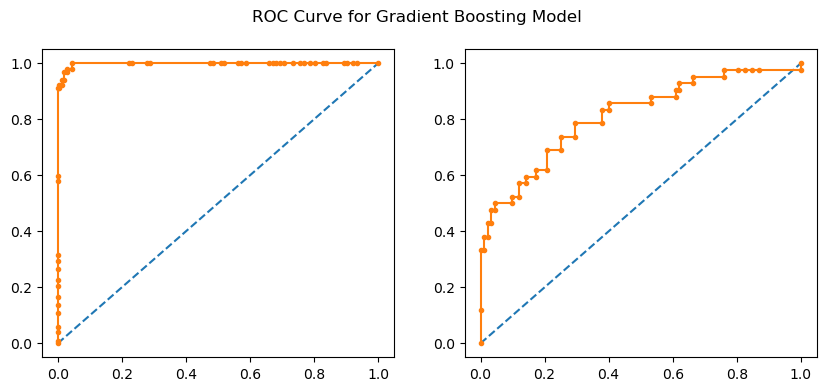

In [96]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Gradient Boosting Model')
gbc_train_prob = gbc_model.predict_proba(X_train)
gbc_train_prob = gbc_train_prob[:,1]
gbc_auc = roc_auc_score(y_train, gbc_train_prob)
print('Training data AUC Score:: %.3f' % gbc_auc)
fpr, tpr, thresholds = roc_curve(y_train, gbc_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gbc_test_prob = gbc_model.predict_proba(X_test)
gbc_test_prob = gbc_test_prob[:,1]
gbc_auc = roc_auc_score(y_test, gbc_test_prob)
print('Test data AUC Score: %.3f' % gbc_auc)
fpr, tpr, thresholds = roc_curve(y_test, gbc_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.14 Gradient BoostingClassifier Tuned

In [97]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
param_grid = {
    "n_estimators": [20,30,40],
    "subsample":[0.9],
    "max_features":[0.8],
    "learning_rate": [0.1],
    'max_depth' : [1,2,3,4,5,10,15,20], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [30,35,40,45], # minimum sample number to split a node
    'min_samples_leaf' : [3,6,9,12,15]
}


gs_gbc = GridSearchCV(estimator = gbc_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True,
                      n_jobs= -1
                      )

gs_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': [0.8],
                         'min_samples_leaf': [3, 6, 9, 12, 15],
                         'min_samples_split': [30, 35, 40, 45],
                         'n_estimators': [20, 30, 40], 'subsample': [0.9]},
             return_train_score=True, verbose=1)

In [98]:
print('Best Params are-', gs_gbc.best_params_)
print('\n\nBest Score is-',gs_gbc.best_score_)

# Set the clf to the best combination of parameters
gs_gbc_tuned = gs_gbc.best_estimator_

gs_gbc_tuned.fit(X_train, y_train)

y_gs_gbc_train_predicted = gs_gbc_tuned.predict(X_train)

y_gs_gbc_test_predicted = gs_gbc_tuned.predict(X_test)

gbc_tuned_score=get_metrics_score(gs_gbc_tuned)

Best Params are- {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 15, 'min_samples_split': 40, 'n_estimators': 40, 'subsample': 0.9}


Best Score is- 0.838716704007966


Accuracy on training set :  0.9
Accuracy on test set :  0.84
Recall on training set :  0.75
Recall on test set :  0.64
Precision on training set :  0.94
Precision on test set :  0.79
F1-Score on training set :  0.84
F1-Score on test set :  0.71
ROC AUC Score on training set :  0.97
ROC AUC Score on test set :  0.85


In [99]:
# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_gbc_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_gbc_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_gbc_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_gbc_test_predicted))

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       208
           1       0.94      0.75      0.84       102

    accuracy                           0.90       310
   macro avg       0.91      0.87      0.88       310
weighted avg       0.91      0.90      0.90       310

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        92
           1       0.79      0.64      0.71        42

    accuracy                           0.84       134
   macro avg       0.82      0.78      0.80       134
weighted avg       0.83      0.84      0.83       134

Confusion matrix for the train data- 
 [[203   5]
 [ 25  77]]

Confusion matrix for the test data- 
 [[85  7]
 [15 27]]


Training data AUC Score: 0.967
Test data AUC Score: 0.846


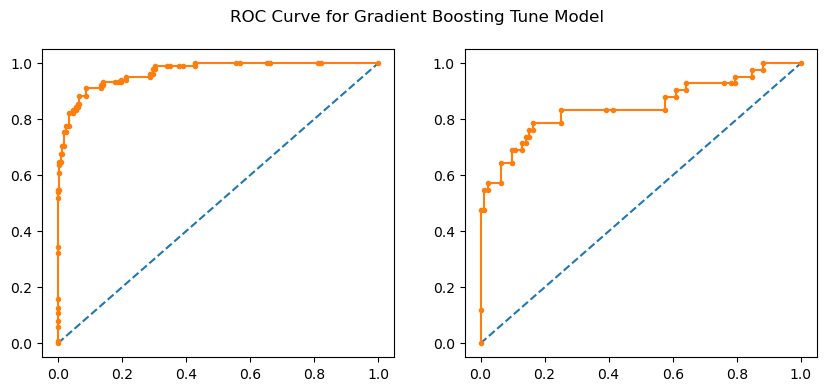

In [100]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('ROC Curve for Gradient Boosting Tune Model')

gs_gbc_train_prob = gs_gbc_tuned.predict_proba(X_train)
gs_gbc_train_prob = gs_gbc_train_prob[:,1]
gs_gbc_auc = roc_auc_score(y_train, gs_gbc_train_prob)
print('Training data AUC Score: %.3f' % gs_gbc_auc)
fpr, tpr, thresholds = roc_curve(y_train, gs_gbc_train_prob)
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

gs_gbc_test_prob = gs_gbc_tuned.predict_proba(X_test)
gs_gbc_test_prob = gs_gbc_test_prob[:,1]
gs_gbc_auc = roc_auc_score(y_test, gs_gbc_test_prob)
print('Test data AUC Score: %.3f' % gs_gbc_auc)
fpr, tpr, thresholds = roc_curve(y_test, gs_gbc_test_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### 1.3.15 Performance Metrics for all the models. Comment on the final model

In [101]:
# defining list of models
models = [lr_model, gs_lr_tuned, lda_model, gs_lda_tuned, GNB_model, gs_gnb_tuned, NNH_model, gs_knn_tuned,dt_model,gs_dt_tuned, 
          RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train =[]
f1_test = []
roc_auc_train = []
roc_auc_test = []

# looping through all the models to get the accuracy, precall and precision scores
for idx,model in enumerate(models):
    if idx == 6 | idx == 7 :
        #print(model)
        j = get_scaled_metrics_score(model,False)
        acc_train.append(np.round(j[0],2))
        acc_test.append(np.round(j[1],2))
        recall_train.append(np.round(j[2],2))
        recall_test.append(np.round(j[3],2))
        precision_train.append(np.round(j[4],2))
        precision_test.append(np.round(j[5],2))
        f1_train.append(np.round(j[6],2))
        f1_test.append(np.round(j[7],2))
        roc_auc_train.append(np.round(j[8],2))
        roc_auc_test.append(np.round(j[9],2))
    
    else:
        #print(model)
        j = get_metrics_score(model,False)
        acc_train.append(np.round(j[0],2))
        acc_test.append(np.round(j[1],2))
        recall_train.append(np.round(j[2],2))
        recall_test.append(np.round(j[3],2))
        precision_train.append(np.round(j[4],2))
        precision_test.append(np.round(j[5],2))
        f1_train.append(np.round(j[6],2))
        f1_test.append(np.round(j[7],2))
        roc_auc_train.append(np.round(j[8],2))
        roc_auc_test.append(np.round(j[9],2))

In [102]:
all_model_comparison = pd.DataFrame({'Model':['Logistic Regression default paramters','Logistic Regression Tuned with GridSearchCV',
                                              'Linear Discriminant Analysis','Linear Discriminant Analysis Tuned with GridSearchCV',
                                              'Naive Bayes with default parameters','Naive Bayes Tuned with GridSearchCV',
                                              'KNN with default Parameters','KNN Tuned with GridSearchCV',
                                              'CART with default Paramteres','CART Tuned with GridSearchCV',
                                              'Random Forest with Default Parameter','Random Forest Tuned with GridSearchCV',
                                              'Gradient Boosting with Default Parameter','Gradient Boosting Tuned with GridSearchCV',
                                             ], 
                                     'TrainAccuracy': acc_train,'TestAccuracy': acc_test,
                                     'Train_Recall':recall_train,'TestRecall':recall_test,
                                     'TrainPrecision':precision_train,'TestPrecision':precision_test,
                                     'TrainF1Score':f1_train, 'TestF1Score':f1_test,
                                     'TrainAUC': roc_auc_train, 'TestAUC': roc_auc_test
                                    })
all_model_comparison

,Model,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainPrecision,TestPrecision,TrainF1Score,TestF1Score,TrainAUC,TestAUC
0,Logistic Regression default paramters,0.80,0.81,0.54,0.60,0.77,0.74,0.64,0.66,0.83,0.82
1,Logistic Regression Tuned with GridSearchCV,0.79,0.81,0.54,0.57,0.76,0.77,0.63,0.66,0.83,0.82
2,Linear Discriminant Analysis,0.80,0.82,0.56,0.62,0.77,0.76,0.65,0.68,0.83,0.81
3,Linear Discriminant Analysis Tuned with GridSearchCV,0.79,0.81,0.51,0.55,0.79,0.77,0.62,0.64,0.83,0.81
4,Naive Bayes with default parameters,0.79,0.79,0.50,0.52,0.80,0.73,0.61,0.61,0.80,0.78
5,Naive Bayes Tuned with GridSearchCV,0.79,0.81,0.46,0.50,0.84,0.84,0.59,0.63,0.80,0.78
6,KNN with default Parameters,0.33,0.31,1.00,1.00,0.33,0.31,0.50,0.48,0.50,0.50
7,KNN Tuned with GridSearchCV,1.00,0.80,1.00,0.50,1.00,0.78,1.00,0.61,1.00,0.81
8,CART with default Paramteres,1.00,0.80,1.00,0.74,1.00,0.66,1.00,0.70,1.00,0.78
9,CART Tuned with GridSearchCV,0.87,0.83,0.77,0.74,0.82,0.72,0.80,0.73,0.94,0.86


### 1.4 Which model performs the best?

 - Since, it is a classification model, the metrics that we need to consider is the combination of Accuracy, Precision, Re-call and F1-Score.  
 - If an employee is actually not using Public Transport and it has been predicted to do so, it implies that the employee will most likely use the Transport facility and it also implies that we predicted a false increase in Revenue. The quantum of loss will depend on the number. So, it(Precision) becomes a very important parameter for evaluating the models.   
 - If an employee is actually using Public Transport and it has been not predicted to do so, it implies that the employee will most likely not use the Transport facility and it also implies that we underestimated the numbers of employee who may chose the Transport Facility. The quantum of loss will depend on the number. So, it (ReCall) is also vital for evaluating the models.    
 - So, the metrics that we need to evaluate is the combination of Accuracy, Precision, Re-call and F1-Score. The most important of all is F1-Score. A good F1-Score will suggest that we have proper balance between the Precision and Recall i.e., Neither of the two are extremely poor.
 - Models such as **'Logistic Regression with Default Parameters'**, **'Logistic Regression Tuned'**, **'Linear Discriminant Analysis'** and **'Linear Discriminant Analysis Tuned'** have good accuracy (79% -84%) and are not overfitting or underfitting but these models have lower Recall(52% - 60%) values, good Precision(77% - 80%) values and lower F1-Score(62% - 68%). Because it has lower F1-Score, we feel these are not the best model.  
 - Models such as **'Naive Bayes with default parameters'** and **'Naive Bayes Tuned'** have good accuracy (80%) score, good precision (80% - 73%) score, but not so good Recall Score (45% - 50%) and therefore not so good F1-Score (60% approx). This is not the best of model metrics.     
 - Models such as **'KNN with default Parameters'**, **'KNN Tuned'** and **'CART with default Paramteres'** show 100% accuracy on training set but 80% accuracy on test set. This is simply the case of overfitting. Referring to Recall, Precision and F1-Score metrics, the models show 100% score on training dataset but 50%, 60% and 70% approx on test dataset. These models are overfitting not only on accuracy metrics but also on other metrics such as Recall, Precision and F1-Score.This is not the best of the models. 
 - Model such as **'CART Tuned'** shows **87% accuracy on training set** and **83% accuracy on test set**. We could also see a better Recall, Precision and F1-Score for this model. Recall on Training set is 77% and on Test set is 74%. Precision on Training set is 82% and Test set is 72%. F1 Score on Training Set is	80% and on Test Set is 73%. AUC Value on Training set is 94% and on Test set is 86%. Precision score seems to be overfitting but overall this model gives a very good score of all the evaluation metrics. So, we can consider this a good Model for prediction in terms of Overall Metrics.
 - Models such as **'Random Forest with Default Parameter'** and **'Random Forest Tuned'** show good accuracy of 87% on training set and 81% on test set. But other metrices do not show promissing score such as F1-Score shows 75% on training data and 65% on test data, Recall shows 66% on training data and 55% on test data.
 - Model such as **'Gradient Boosting with Default Parameter'** show 97% accuracy on training set but 76% accuracy on test set. This is simply the case of overfitting. Referring to Recall, Precision and F1-Score metrics, the model shows 91% , 99% and 95% score on training dataset but 60% approx on test dataset. This model is overfitting not only on accuracy metrics but also on other metrics such as Recall, Precision and F1-Score.This is not the best of the models.
 - Model such as **'Gradient Boosting Tuned'** show 91% accuracy on training set and 84% accuracy on test set. Referring to Recall, Precision and F1-Score metrics, the model shows 75% , 96% and 84% score on training dataset but 62%, 81% and 70% respectively on test dataset. This model is overfitting on Recall, Precision and F1-Score.This is not the best model if we consider Recall, Precision and F1-Score metrics. But when we check accuracy, it is the best model.
 
 - **Overall, the best model based on Accuracy is Gradient Boosting Tuned with an accuracy of 84% on test data followed by the CART Tuned model with an accuracy 83% on test data.** 

### 1.5 What are your business insights?

- Some of the business insights from EDA as well as models are: 
    - We could see that employees who are at lesser distance from Home to Office prefer Public Transport whereas employees who are farther away prefer Private Transport.
    - Employees who have higher experience, in turn has more salary, prefer to travel through private transport rather than taking Public Transport.
    - We have high positive correlation among features such as Age, Work Experience and Salary, which in turn is in positive relationship with predictor variable.
    - Male Employees travel more distance from private transport than the distance travelled by female employees.
    - We also see that male employees who do not have license seem to use Public Transport, and those who have license seems to use Private Transport.
    - Male Employees travel more distance from private transport than the distance travelled by female employees.
    - On Average, Male and Female employees travel 10 km of distance approx. by public transport whereas the distance travelled by Male and Female employees by private transport is 13 km.
    - Employees travelling from private transport earn higher salary (more than 25 lpa) from the employees who travel from public transport.
    - The average age of the male and female employees who travels from public transport is 27 whereas the average age of male employees who travel by private transport is 32 years and average age of female who travel by private transport is 26 years.
    - Employees who are more than 35 years old prefer to travel from private transport
    - The number of male employees who do not have license is more than the number of females employees who do not have license.
    - The number of males employees who have license is more than the number of females employees who have license.
    - The number of employees who use Public Transport and do not have license is more than the number of employees who use Private Transport and do not have license.
    - The number of employees who use Public Transport and have license is approx. same as the number of employees who use Private Transport and have license.
    - 'Gradient Boosting Tuned' show 91% accuracy on training set and 84% accuracy on test set provides the best result in terms of accuracy. Then second-best model is Decision Tree Classifier (CART Tuned) model when tuned provides best result in predicting the Target Variable – Transport variable. It shows 87% accuracy on training set and 83% accuracy on test set.